# NASA Space Technology Project : Hunting Exoplanets In Space
#  Deploying a Prediction Model

Dataset links (don't click on them):

1. Train dataset

  https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/kepler-exoplanets-dataset/exoTrain.csv

2. Test dataset

  https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/kepler-exoplanets-dataset/exoTest.csv

In [ ]:
# Importing the 'RandomForestClassifier' module from the 'sklearn.ensemble' library.
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Importing the 'confusion_matrix' and 'classification_report' functions from the 'sklearn.metrics' module.
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# Loading the datasets.
import pandas as pd
import numpy as np

exo_train_df = pd.read_csv('https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/kepler-exoplanets-dataset/exoTrain.csv')
exo_test_df = pd.read_csv('https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/kepler-exoplanets-dataset/exoTest.csv')

In [ ]:
# Number of rows and columns in the DataFrames.
print(exo_train_df.shape)
exo_test_df.shape

(5087, 3198)


(570, 3198)

In [ ]:
# The number of times a value occurs in a Pandas series.
exo_test_df['LABEL'].value_counts()

1    565
2      5
Name: LABEL, dtype: int64

In [ ]:
# Extracting feature variables from the training dataset.
x_train = exo_train_df.iloc[:, 1:]
x_train.head()

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,FLUX.11,FLUX.12,FLUX.13,FLUX.14,FLUX.15,FLUX.16,FLUX.17,FLUX.18,FLUX.19,FLUX.20,FLUX.21,FLUX.22,FLUX.23,FLUX.24,FLUX.25,FLUX.26,FLUX.27,FLUX.28,FLUX.29,FLUX.30,FLUX.31,FLUX.32,FLUX.33,FLUX.34,FLUX.35,FLUX.36,FLUX.37,FLUX.38,FLUX.39,FLUX.40,...,FLUX.3158,FLUX.3159,FLUX.3160,FLUX.3161,FLUX.3162,FLUX.3163,FLUX.3164,FLUX.3165,FLUX.3166,FLUX.3167,FLUX.3168,FLUX.3169,FLUX.3170,FLUX.3171,FLUX.3172,FLUX.3173,FLUX.3174,FLUX.3175,FLUX.3176,FLUX.3177,FLUX.3178,FLUX.3179,FLUX.3180,FLUX.3181,FLUX.3182,FLUX.3183,FLUX.3184,FLUX.3185,FLUX.3186,FLUX.3187,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,-160.17,-207.47,-154.88,-173.71,-146.56,-120.26,-102.85,-98.71,-48.42,-86.57,-0.84,-25.85,-67.39,-36.55,-87.01,-97.72,-131.59,-134.80,-186.97,-244.32,-225.76,-229.60,-253.48,-145.74,-145.74,30.47,-173.39,-187.56,-192.88,-182.76,-195.99,...,-167.69,-56.86,7.56,37.40,-81.13,-20.10,-30.34,-320.48,-320.48,-287.72,-351.25,-70.07,-194.34,-106.47,-14.80,63.13,130.03,76.43,131.90,-193.16,-193.16,-89.26,-17.56,-17.31,125.62,68.87,100.01,-9.60,-25.39,-16.51,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,-73.38,-86.51,-74.97,-73.15,-86.13,-76.57,-61.27,-37.23,-48.53,-30.96,-8.14,-5.54,15.79,45.71,10.61,40.66,16.70,15.18,11.98,-203.70,19.13,19.13,19.13,19.13,19.13,17.02,-8.50,-13.87,-29.10,-34.29,-24.68,...,-36.75,-15.49,-13.24,20.46,-1.47,-0.40,27.80,-58.20,-58.20,-72.04,-58.01,-30.92,-13.42,-13.98,-5.43,8.71,1.80,36.59,-9.80,-19.53,-19.53,-24.32,-23.88,-33.07,-9.03,3.75,11.61,-12.66,-5.69,12.53,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,484.39,469.66,462.30,492.23,441.20,483.17,481.28,535.31,554.34,562.80,540.14,576.34,551.67,556.69,550.86,577.33,562.08,577.97,530.67,553.27,538.33,527.17,532.50,273.66,273.66,292.39,298.44,252.64,233.58,171.41,224.02,...,-51.09,-33.30,-61.53,-89.61,-69.17,-86.47,-140.91,-84.20,-84.20,-89.09,-55.44,-61.05,-29.17,-63.80,-57.61,2.70,-31.25,-47.09,-6.53,14.00,14.00,-25.05,-34.98,-32.08,-17.06,-27.77,7.86,-70.77,-64.44,-83.83,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,323.33,311.14,326.19,313.11,313.89,317.96,330.92,341.10,360.58,370.29,369.71,339.00,336.24,319.31,321.56,308.02,296.82,279.34,275.78,289.67,281.33,285.37,281.87,88.75,88.75,67.71,74.46,69.34,76.51,80.26,70.31,...,-2.75,14.29,-14.18,-25.14,-13.43,-14.74,2.24,-31.07,-31.07,-50.27,-39.22,-51.33,-18.53,-1.99,10.43,-1.97,-15.32,-23.38,-27.71,-36.12,-36.12,-15.65,6.63,10.66,-8.57,-8.29,-21.90,-25.80,-29.86,7.42,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,-970.88,-933.30,-889.49,-888.66,-853.95,-800.91,-754.48,-717.24,-649.34,-605.71,-575.62,-526.37,-490.12,-458.73,-447.76,-419.54,-410.76,-404.10,-425.38,-397.29,-412.73,-446.49,-413.46,-1006.21,-1006.21,-973.29,-986.01,-975.88,-982.20,-953.73,-964.35,...,-694.76,-705.01,-625.24,-604.16,-668.26,-742.18,-820.55,-874.76,-874.76,-853.68,-808.62,-777.88,-712.62,-694.01,-655.74,-599.74,-617.30,-602.98,-539.29,-672.71,-672.71,-594.49,-597.60,-560.77,-501.95,-461.62,-468.59,-513.24,-504.70,-521.95,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [ ]:
# Getting the data description by calling the 'describe()' function.
exo_train_df.describe()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,FLUX.11,FLUX.12,FLUX.13,FLUX.14,FLUX.15,FLUX.16,FLUX.17,FLUX.18,FLUX.19,FLUX.20,FLUX.21,FLUX.22,FLUX.23,FLUX.24,FLUX.25,FLUX.26,FLUX.27,FLUX.28,FLUX.29,FLUX.30,FLUX.31,FLUX.32,FLUX.33,FLUX.34,FLUX.35,FLUX.36,FLUX.37,FLUX.38,FLUX.39,...,FLUX.3158,FLUX.3159,FLUX.3160,FLUX.3161,FLUX.3162,FLUX.3163,FLUX.3164,FLUX.3165,FLUX.3166,FLUX.3167,FLUX.3168,FLUX.3169,FLUX.3170,FLUX.3171,FLUX.3172,FLUX.3173,FLUX.3174,FLUX.3175,FLUX.3176,FLUX.3177,FLUX.3178,FLUX.3179,FLUX.3180,FLUX.3181,FLUX.3182,FLUX.3183,FLUX.3184,FLUX.3185,FLUX.3186,FLUX.3187,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
count,5087.000000,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5087.000000,5087.000000,5087.000000,5087.00000,5087.000000,5087.000000,5087.000000,5087.000000,5087.000000,5087.000000,5087.000000,5087.000000,5087.000000,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,...,5.087000e+03,5.087000e+03,5.087000e+03,5087.000000,5087.000000,5087.000000,5087.000000,5087.000000,5087.000000,5087.000000,5087.000000,5087.000000,5.087000e+03,5.087000e+03,5087.000000,5087.000000,5087.000000,5087.000000,5087.000000,5087.000000,5087.000000,5087.000000,5087.000000,5087.000000,5087.000000,5087.000000,5087.000000,5087.000000,5087.000000,5087.000000,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5087.000000,5087.000000,5087.000000,5087.000000
mean,1.007273,1.445054e+02,1.285778e+02,1.471348e+02,1.561512e+02,1.561477e+02,1.469646e+02,1.168380e+02,1.144983e+02,1.228639e+02,1.410852e+02,1.124563e+02,1.050821e+02,7.720985e+01,60.143330,17.630999,-54.355089,-103.08460,-144.560114,-113.322037,-68.828616,-32.839733,31.196475,88.517940,175.080436,233.700224,281.801687,4.643881e+02,5.347781e+02,5.686202e+02,5.575065e+02,5.667802e+02,5.469081e+02,1.775987e+02,1.977492e+02,2.291148e+02,2.441020e+02,2.501690e+02,2.613476e+02,2.326228e+02,...,8.001983e+02,8.456118e+02,7.564445e+02,116.982994,158.543973,129.188885,5.817181,-97.778421,-84.500629,-2.522744,125.509414,354.448954,6.254212e+02,8.012768e+02,106.772064,80.353945,12.455127,-94.172579,-181.646112,-320.240619,-358.358437,-323.468262,-281.609027,-213.522064,-107.086774,-110.572898,-71.794968,-31.777614,72.747847,126.815573,3.485578e+02,4.956476e+02,6.711211e+02,7.468790e+02,6.937372e+02,6.553031e+02,-494.784966,-544.594264,-440.239100,-300.536399
std,0.084982,2.150669e+04,2.179717e+04,2.191309e+04,2.223366e+04,2.308448e+04,2.410567e+04,2.414109e+04,2.290691e+04,2.102681e+04,1.942289e+04,1.832810e+04,1.768321e+04,1.731920e+04,16647.817648,16725.088231,17162.322247,17356.98839,16979.436723,16011.508248,15118.835589,14255.363528,14048.475841,14618.614614,15246.020915,16803.416700,17930.530299,2.523553e+04,2.704750e+04,2.964609e+04,3.315534e+04,3.679672e+04,4.144422e+04,2.071160e+04,2.108089e+04,2.144121e+04,2.175216e+04,2.180420e+04,2.164199e+04,2.132321e+04,...,5.116648e+04,5.829319e+04,5.898207e+04,16075.902775,16263.350901,15613.273881,14397.292446,14887.907167,14466.376116,12079.533421,12455.557157,20116.003038,3.307799e+04,4.613980e+04,15648.242604,15514.533197,14142.137616,13113.457203,13161.476260,14165.866392,15083.632082,14587.243316,13548.583112,11544.505620,10369.103689,10653.997273,10238.433598,10849.383610,16548.155180,20119.224581,2.864786e+04,3.551876e+04,4.349963e+04,4.981375e+04,5.087103e+04,5.339979e+04,17844.469520,17722.339334,16273.406292,14459.795577
min,1.000000,-2.278563e+05,-3.154408e+05,-2.840018e+05,-2.340069e+05,-4.231956e+05,-5.975521e+05,-6.724046e+05,-5.790136e+05,-3.973882e+05,-2.223300e+05,-2.279016e+05,-2.996757e+05,-4.453612e+05,-557042.690000,-695994.840000,-815633.560000,-880865.85000,-892477.410000,-85

In [ ]:
# Retrieve only the first column, i.e., the 'LABEL' column.
y_train = exo_train_df.iloc[:, 0] 
y_train.head()

0    2
1    2
2    2
3    2
4    2
Name: LABEL, dtype: int64

In [ ]:
# Training the 'RandomForestClassifier' model using the 'fit()' function.
rf_clf = RandomForestClassifier(n_jobs=-1, n_estimators=50)
rf_clf.fit(x_train, y_train)

rf_clf.score(x_train, y_train)

0.9996068409671712

In [ ]:
# Extracting the feature variables from the test dataset.
x_test = exo_test_df.iloc[:, 1:]
x_test.head()

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,FLUX.11,FLUX.12,FLUX.13,FLUX.14,FLUX.15,FLUX.16,FLUX.17,FLUX.18,FLUX.19,FLUX.20,FLUX.21,FLUX.22,FLUX.23,FLUX.24,FLUX.25,FLUX.26,FLUX.27,FLUX.28,FLUX.29,FLUX.30,FLUX.31,FLUX.32,FLUX.33,FLUX.34,FLUX.35,FLUX.36,FLUX.37,FLUX.38,FLUX.39,FLUX.40,...,FLUX.3158,FLUX.3159,FLUX.3160,FLUX.3161,FLUX.3162,FLUX.3163,FLUX.3164,FLUX.3165,FLUX.3166,FLUX.3167,FLUX.3168,FLUX.3169,FLUX.3170,FLUX.3171,FLUX.3172,FLUX.3173,FLUX.3174,FLUX.3175,FLUX.3176,FLUX.3177,FLUX.3178,FLUX.3179,FLUX.3180,FLUX.3181,FLUX.3182,FLUX.3183,FLUX.3184,FLUX.3185,FLUX.3186,FLUX.3187,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,119.88,100.21,86.46,48.68,46.12,39.39,18.57,6.98,6.63,-21.97,-23.17,-29.26,-33.99,-6.25,-28.12,-27.24,-32.28,-12.29,-16.57,-23.86,-5.69,9.24,35.52,81.20,116.49,133.99,148.97,174.15,187.77,215.30,246.80,-56.68,-56.68,-56.68,-52.05,-31.52,-31.15,-48.53,-38.93,-26.06,...,-2.55,12.26,-7.06,-23.53,2.54,30.21,38.87,-22.86,-22.86,-4.37,2.27,-16.27,-30.84,-7.21,-4.27,13.60,15.62,31.96,49.89,86.93,86.93,42.99,48.76,22.82,32.79,30.76,14.55,10.92,22.68,5.91,14.52,19.29,14.44,-1.62,13.33,45.50,31.93,35.78,269.43,57.72
1,5736.59,5699.98,5717.16,5692.73,5663.83,5631.16,5626.39,5569.47,5550.44,5458.80,5329.39,5191.38,5031.39,4769.89,4419.66,4218.92,3924.73,3605.30,3326.55,3021.20,2800.61,2474.48,2258.33,1951.69,1749.86,1585.38,1575.48,1568.41,1661.08,1977.33,2425.62,2889.61,3847.64,3847.64,3741.20,3453.47,3202.61,2923.73,2694.84,2474.22,...,-3470.75,-4510.72,-5013.41,-3636.05,-2324.27,-2688.55,-2813.66,-586.22,-586.22,-756.80,-1090.23,-1388.61,-1745.36,-2015.28,-2359.06,-2516.66,-2699.31,-2777.55,-2732.97,1167.39,1167.39,1368.89,1434.80,1360.75,1148.44,1117.67,714.86,419.02,57.06,-175.66,-581.91,-984.09,-1230.89,-1600.45,-1824.53,-2061.17,-2265.98,-2366.19,-2294.86,-2034.72
2,844.48,817.49,770.07,675.01,605.52,499.45,440.77,362.95,207.27,150.46,85.49,-20.12,-35.88,-65.59,-15.12,16.60,-25.70,61.88,53.18,64.32,72.38,100.35,67.26,14.71,-16.41,-147.46,-231.27,-320.29,-407.82,-450.48,-146.99,-146.99,-146.99,-146.99,-166.30,-139.90,-96.41,-23.49,13.59,67.59,...,-35.24,-70.13,-35.30,-56.48,-74.60,-115.18,-8.91,-37.59,-37.59,-37.43,-104.23,-101.45,-107.35,-109.82,-126.27,-170.32,-117.85,-32.30,-70.18,314.29,314.29,314.29,149.71,54.60,12.60,-133.68,-78.16,-52.30,-8.55,-19.73,17.82,-51.66,-48.29,-59.99,-82.10,-174.54,-95.23,-162.68,-36.79,30.63
3,-826.00,-827.31,-846.12,-836.03,-745.50,-784.69,-791.22,-746.50,-709.53,-679.56,-706.03,-720.56,-631.12,-659.16,-672.03,-665.06,-667.94,-660.84,-672.75,-644.91,-680.53,-620.50,-570.34,-530.00,-537.88,-578.38,-532.34,-532.38,-491.03,-485.03,-427.19,-380.84,-329.50,-286.91,-283.81,-298.19,-271.03,-268.50,-209.56,-180.44,...,16.50,-1286.59,-1286.59,-1286.59,-1286.59,-1286.59,-1286.59,-1286.59,-1286.59,-14.94,64.09,8.38,45.31,100.72,91.53,46.69,20.34,30.94,-36.81,-33.28,-69.62,-208.00,-280.28,-340.41,-337.41,-268.03,-245.00,-230.62,-129.59,-35.47,122.34,93.03,93.03,68.81,9.81,20.75,20.25,-120.81,-257.56,-215.41
4,-39.57,-15.88,-9.16,-6.37,-16.13,-24.05,-0.90,-45.20,-5.04,14.62,-19.52,-11.43,-49.80,25.84,11.62,3.18,-9.59,14.49,8.82,32.32,-28.90,-28.90,-14.09,-30.87,-18.99,-38.60,-27.79,9.65,29.60,7.88,42.87,27.59,27.05,20.26,29.48,9.71,22.84,25.99,-667.55,-1336.24,...,-122.12,-32.01,-47.15,-56.45,-41.71,-34.13,-43.12,-53.63,-53.63,-53.63,-24.29,22.29,25.18,1.84,-22.29,-26.43,-12.12,-33.05,-21.66,-228.32,-228.32,-228.32,-187.35,-166.23,-115.54,-50.18,-37.96,-22.37,-4.74,-35.82,-37.87,-61.85,-27.15,-21.18,-33.76,-85.34,-81.46,-61.98,-69.34,-17.84


In [ ]:
# Extracting the target variable from the test dataset.
y_test = exo_test_df.iloc[:, 0]
y_test.head()

0    2
1    2
2    2
3    2
4    2
Name: LABEL, dtype: int64

In [ ]:
# Making predictions using the 'predict()' function.
y_predicted = rf_clf.predict(x_test)
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
# Converting the NumPy array of predicted values into a Pandas series.
y_predicted = pd.Series(y_predicted)
y_predicted.head()

0    1
1    1
2    1
3    1
4    1
dtype: int64

In [ ]:
# Using the 'value_counts()' function, count the number of times 1 and 2 occur in the predicted values.
y_predicted.value_counts()

1    570
dtype: int64

In [ ]:
# Createing a confusion matrix using the 'y_test' and 'y_predicted' values.
confusion_matrix(y_test,y_predicted)


array([[565,   0],
       [  5,   0]])

In [ ]:
# Printing the 'precision', 'recall' and 'f1-score' values using the 'classification_report()' function.
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           1       0.99      1.00      1.00       565
           2       0.00      0.00      0.00         5

    accuracy                           0.99       570
   macro avg       0.50      0.50      0.50       570
weighted avg       0.98      0.99      0.99       570



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                        **DATA NORMALISATION**

In [ ]:
# Createing a function to normalise a Pandas series using the mean normalisation method.
def mean_normalise(series):
  norm = (series - series.mean())/(series.max() - series.min())
  return norm 
  

In [ ]:
# Testing the 'mean_normalise()' function on the '[5, 192, 20019, 12, 209]' series.
series = pd.Series([5, 192, 20019, 12, 209])
mean_normalise(series)

0   -0.203977
1   -0.194634
2    0.796023
3   -0.203627
4   -0.193784
dtype: float64

In [ ]:
# Applying the 'mean_normalise' function horizontally on the training DataFrame. 
norm_train_df = exo_train_df.iloc[: , 1:].apply(mean_normalise,axis=0)
# After applying the 'mean_normalise' function on the 'exo_train_df' DataFrame, let's print the first 5 rows of the new DataFrame.
norm_train_df.head()

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,FLUX.11,FLUX.12,FLUX.13,FLUX.14,FLUX.15,FLUX.16,FLUX.17,FLUX.18,FLUX.19,FLUX.20,FLUX.21,FLUX.22,FLUX.23,FLUX.24,FLUX.25,FLUX.26,FLUX.27,FLUX.28,FLUX.29,FLUX.30,FLUX.31,FLUX.32,FLUX.33,FLUX.34,FLUX.35,FLUX.36,FLUX.37,FLUX.38,FLUX.39,FLUX.40,...,FLUX.3158,FLUX.3159,FLUX.3160,FLUX.3161,FLUX.3162,FLUX.3163,FLUX.3164,FLUX.3165,FLUX.3166,FLUX.3167,FLUX.3168,FLUX.3169,FLUX.3170,FLUX.3171,FLUX.3172,FLUX.3173,FLUX.3174,FLUX.3175,FLUX.3176,FLUX.3177,FLUX.3178,FLUX.3179,FLUX.3180,FLUX.3181,FLUX.3182,FLUX.3183,FLUX.3184,FLUX.3185,FLUX.3186,FLUX.3187,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,-0.000030,-0.000025,-0.000072,-0.000106,-0.000101,-0.000129,-0.000118,-0.000106,-0.000117,-0.000203,-0.000227,-0.000188,-0.000173,-0.000140,-0.000090,-0.000031,0.000003,0.000063,0.000018,0.000050,0.000006,-0.000100,-0.000137,-0.000286,-0.000321,-0.000357,-0.000332,-0.000395,-0.000437,-0.000378,-0.000322,-0.000270,-0.000208,-0.000217,-0.000123,-0.000256,-0.000267,-0.000277,-0.000256,-0.000224,...,-0.000246,-0.000196,-0.000163,-0.000056,-0.000170,-0.000116,-0.000031,-0.000218,-2.533925e-04,-0.000342,-0.000590,-0.000337,-0.000332,-0.000261,-0.000090,-0.000013,0.000095,0.000147,0.000283,0.000125,0.000174,0.000270,0.000322,0.000243,0.000283,0.000224,0.000212,0.000027,-0.000090,-0.000117,-0.000203,-0.000223,-0.000235,-0.000194,-0.000169,-0.000137,0.000502,0.000639,0.000490,0.000305
1,-0.000110,-0.000092,-0.000117,-0.000113,-0.000122,-0.000104,-0.000095,-0.000100,-0.000119,-0.000144,-0.000141,-0.000130,-0.000104,-0.000099,-0.000062,-0.000004,0.000042,0.000063,0.000057,0.000045,0.000023,-0.000016,-0.000047,-0.000179,-0.000187,-0.000229,-0.000249,-0.000286,-0.000415,-0.000260,-0.000221,-0.000178,-0.000102,-0.000113,-0.000132,-0.000155,-0.000161,-0.000177,-0.000165,-0.000123,...,-0.000212,-0.000187,-0.000167,-0.000068,-0.000114,-0.000101,0.000019,0.000039,2.824138e-05,-0.000083,-0.000227,-0.000306,-0.000259,-0.000234,-0.000083,-0.000054,-0.000009,0.000112,0.000155,0.000296,0.000357,0.000345,0.000314,0.000224,0.000119,0.000143,0.000103,0.000024,-0.000072,-0.000093,-0.000167,-0.000197,-0.000214,-0.000208,-0.000183,-0.000159,0.000454,0.000581,0.000502,0.000375
2,0.000233,0.000230,0.000209,0.000197,0.000155,0.000152,0.000163,0.000186,0.000180,0.000231,0.000254,0.000258,0.000287,0.000259,0.000304,0.000340,0.000406,0.000458,0.000466,0.000448,0.000521,0.000530,0.000514,0.000410,0.000333,0.000242,0.000063,-0.000002,-0.000008,-0.000009,-0.000016,-0.000005,0.000062,0.000048,0.000039,0.000033,0.000002,-0.000017,-0.000038,0.000025,...,-0.000216,-0.000191,-0.000178,-0.000145,-0.000162,-0.000168,-0.000127,0.000013,3.228127e-07,-0.000104,-0.000224,-0.000330,-0.000265,-0.000248,-0.000122,-0.000059,-0.000035,0.000040,0.000158,0.000329,0.000392,0.000344,0.000301,0.000225,0.000109,0.000104,0.000098,-0.000048,-0.000125,-0.000172,-0.000200,-0.000180,-0.000200,-0.000209,-0.000188,-0.000158,0.000454,0.000544,0.000407,0.000239
3,0.000109,0.000124,0.000089,0.000082,0.000084,0.000079,0.000096,0.000099,0.000109,0.000123,0.000141,0.000160,0.000163,0.000172,0.000196,0.000244,0.000283,0.000331,0.000333,0.000323,0.000318,0.000311,0.000254,0.000160,0.000072,0.000013,-0.000103,-0.000142,-0.000150,-0.000133,-0.000114,-0.000089,-0.000057,-0.000069,-0.000100,-0.000104,-0.000110,-0.000113,-0.000094,-0.000067,...,-0.000204,-0.000180,-0.000168,-0.000100,-0.000122,-0.000112,-0.000003,0.000065,5.737332e-05,-0.000057,-0.000204,-0.000322,-0.000261,-0.000231,-0.000071,-0.000062,-0.000022,0.000061,0.000139,0.000280,0.000339,0.000355,0.000352,0.000278,0.000120,0.000128,0.000062,0.000007,-0.000094,-0.000097,-0.000163,-0.000186,-0.000205,-0.000193,-0.000177,-0.000162,0.000457,0.000556,0.000465,0.000368
4,-0.000751,-0.000702,-0.000722,-0.000723,-0.000628,-0.000561,-0.000522,-0.000570,-0.000639,-0.000748,-0.000743,-0.000720,-0.000667,-0.000621,-0.000535,-0.000444,-0.000391,-0.00033

In [ ]:
# Applying the 'insert()' function to add the 'LABEL' column to the 'norm_train_df' DataFrame.
norm_train_df.insert(loc=0,column="LABEL2",value=exo_train_df.iloc[:,0])
# After inserting the 'LABEL' column to the 'norm_train_df' DataFrame, print its first five rows.
norm_train_df.head()

,LABEL2,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,FLUX.11,FLUX.12,FLUX.13,FLUX.14,FLUX.15,FLUX.16,FLUX.17,FLUX.18,FLUX.19,FLUX.20,FLUX.21,FLUX.22,FLUX.23,FLUX.24,FLUX.25,FLUX.26,FLUX.27,FLUX.28,FLUX.29,FLUX.30,FLUX.31,FLUX.32,FLUX.33,FLUX.34,FLUX.35,FLUX.36,FLUX.37,FLUX.38,FLUX.39,...,FLUX.3158,FLUX.3159,FLUX.3160,FLUX.3161,FLUX.3162,FLUX.3163,FLUX.3164,FLUX.3165,FLUX.3166,FLUX.3167,FLUX.3168,FLUX.3169,FLUX.3170,FLUX.3171,FLUX.3172,FLUX.3173,FLUX.3174,FLUX.3175,FLUX.3176,FLUX.3177,FLUX.3178,FLUX.3179,FLUX.3180,FLUX.3181,FLUX.3182,FLUX.3183,FLUX.3184,FLUX.3185,FLUX.3186,FLUX.3187,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,-0.000030,-0.000025,-0.000072,-0.000106,-0.000101,-0.000129,-0.000118,-0.000106,-0.000117,-0.000203,-0.000227,-0.000188,-0.000173,-0.000140,-0.000090,-0.000031,0.000003,0.000063,0.000018,0.000050,0.000006,-0.000100,-0.000137,-0.000286,-0.000321,-0.000357,-0.000332,-0.000395,-0.000437,-0.000378,-0.000322,-0.000270,-0.000208,-0.000217,-0.000123,-0.000256,-0.000267,-0.000277,-0.000256,...,-0.000246,-0.000196,-0.000163,-0.000056,-0.000170,-0.000116,-0.000031,-0.000218,-2.533925e-04,-0.000342,-0.000590,-0.000337,-0.000332,-0.000261,-0.000090,-0.000013,0.000095,0.000147,0.000283,0.000125,0.000174,0.000270,0.000322,0.000243,0.000283,0.000224,0.000212,0.000027,-0.000090,-0.000117,-0.000203,-0.000223,-0.000235,-0.000194,-0.000169,-0.000137,0.000502,0.000639,0.000490,0.000305
1,2,-0.000110,-0.000092,-0.000117,-0.000113,-0.000122,-0.000104,-0.000095,-0.000100,-0.000119,-0.000144,-0.000141,-0.000130,-0.000104,-0.000099,-0.000062,-0.000004,0.000042,0.000063,0.000057,0.000045,0.000023,-0.000016,-0.000047,-0.000179,-0.000187,-0.000229,-0.000249,-0.000286,-0.000415,-0.000260,-0.000221,-0.000178,-0.000102,-0.000113,-0.000132,-0.000155,-0.000161,-0.000177,-0.000165,...,-0.000212,-0.000187,-0.000167,-0.000068,-0.000114,-0.000101,0.000019,0.000039,2.824138e-05,-0.000083,-0.000227,-0.000306,-0.000259,-0.000234,-0.000083,-0.000054,-0.000009,0.000112,0.000155,0.000296,0.000357,0.000345,0.000314,0.000224,0.000119,0.000143,0.000103,0.000024,-0.000072,-0.000093,-0.000167,-0.000197,-0.000214,-0.000208,-0.000183,-0.000159,0.000454,0.000581,0.000502,0.000375
2,2,0.000233,0.000230,0.000209,0.000197,0.000155,0.000152,0.000163,0.000186,0.000180,0.000231,0.000254,0.000258,0.000287,0.000259,0.000304,0.000340,0.000406,0.000458,0.000466,0.000448,0.000521,0.000530,0.000514,0.000410,0.000333,0.000242,0.000063,-0.000002,-0.000008,-0.000009,-0.000016,-0.000005,0.000062,0.000048,0.000039,0.000033,0.000002,-0.000017,-0.000038,...,-0.000216,-0.000191,-0.000178,-0.000145,-0.000162,-0.000168,-0.000127,0.000013,3.228127e-07,-0.000104,-0.000224,-0.000330,-0.000265,-0.000248,-0.000122,-0.000059,-0.000035,0.000040,0.000158,0.000329,0.000392,0.000344,0.000301,0.000225,0.000109,0.000104,0.000098,-0.000048,-0.000125,-0.000172,-0.000200,-0.000180,-0.000200,-0.000209,-0.000188,-0.000158,0.000454,0.000544,0.000407,0.000239
3,2,0.000109,0.000124,0.000089,0.000082,0.000084,0.000079,0.000096,0.000099,0.000109,0.000123,0.000141,0.000160,0.000163,0.000172,0.000196,0.000244,0.000283,0.000331,0.000333,0.000323,0.000318,0.000311,0.000254,0.000160,0.000072,0.000013,-0.000103,-0.000142,-0.000150,-0.000133,-0.000114,-0.000089,-0.000057,-0.000069,-0.000100,-0.000104,-0.000110,-0.000113,-0.000094,...,-0.000204,-0.000180,-0.000168,-0.000100,-0.000122,-0.000112,-0.000003,0.000065,5.737332e-05,-0.000057,-0.000204,-0.000322,-0.000261,-0.000231,-0.000071,-0.000062,-0.000022,0.000061,0.000139,0.000280,0.000339,0.000355,0.000352,0.000278,0.000120,0.000128,0.000062,0.000007,-0.000094,-0.000097,-0.000163,-0.000186,-0.000205,-0.000193,-0.000177,-0.000162,0.000457,0.000556,0.000465,0.000368
4,2,-0.000751,-0.000702,-0.000722,-0.000723,-0.000628,-0.000561,-0.000522,-0.000570,-0.000639,-0.000748,-0.000743,-0.000720,-0.000667,-0.000621,-0.000535,-0.000444,-0.000391,-0.000331,-0.000339,-0.000373,-0.00042

In [ ]:
# Applying the 'mean_normalize()' function on the testing DataFrame. Store the new DataFrame in the 'norm_test_df' variable.
norm_test_df = exo_test_df.iloc[:,1:].apply(mean_normalise, axis=1)
# After applying, the 'mean_normalise()' function on the 'exo_test_df' DataFrame, print the first 5 rows of the new DataFrame.
norm_test_df.head()

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,FLUX.11,FLUX.12,FLUX.13,FLUX.14,FLUX.15,FLUX.16,FLUX.17,FLUX.18,FLUX.19,FLUX.20,FLUX.21,FLUX.22,FLUX.23,FLUX.24,FLUX.25,FLUX.26,FLUX.27,FLUX.28,FLUX.29,FLUX.30,FLUX.31,FLUX.32,FLUX.33,FLUX.34,FLUX.35,FLUX.36,FLUX.37,FLUX.38,FLUX.39,FLUX.40,...,FLUX.3158,FLUX.3159,FLUX.3160,FLUX.3161,FLUX.3162,FLUX.3163,FLUX.3164,FLUX.3165,FLUX.3166,FLUX.3167,FLUX.3168,FLUX.3169,FLUX.3170,FLUX.3171,FLUX.3172,FLUX.3173,FLUX.3174,FLUX.3175,FLUX.3176,FLUX.3177,FLUX.3178,FLUX.3179,FLUX.3180,FLUX.3181,FLUX.3182,FLUX.3183,FLUX.3184,FLUX.3185,FLUX.3186,FLUX.3187,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,0.273347,0.228221,0.196676,0.110003,0.104130,0.088690,0.040926,0.014337,0.013534,-0.052079,-0.054832,-0.068804,-0.079655,-0.016015,-0.066188,-0.064169,-0.075732,-0.029872,-0.039691,-0.056415,-0.014730,0.019521,0.079812,0.184609,0.265570,0.305717,0.340084,0.397851,0.429097,0.492255,0.564521,-0.131709,-0.131709,-0.131709,-0.121087,-0.073988,-0.073140,-0.113012,-0.090988,-0.061462,...,-0.007527,0.026450,-0.017873,-0.055658,0.004151,0.067630,0.087497,-0.054121,-0.054121,-0.011702,0.003531,-0.039003,-0.072428,-0.018217,-0.011473,0.029524,0.034158,0.071645,0.112779,0.197754,0.197754,0.096949,0.110186,0.050676,0.073549,0.068892,0.031703,0.023376,0.050355,0.011882,0.031635,0.042578,0.031451,-0.005393,0.028904,0.102708,0.071576,0.080408,0.616438,0.130742
1,0.394038,0.391480,0.392680,0.390974,0.388955,0.386673,0.386340,0.382364,0.381035,0.374634,0.365595,0.355955,0.344779,0.326513,0.302050,0.288028,0.267479,0.245166,0.225696,0.204367,0.188959,0.166178,0.151080,0.129661,0.115564,0.104075,0.103383,0.102889,0.109362,0.131452,0.162766,0.195175,0.262094,0.262094,0.254659,0.234561,0.217038,0.197559,0.181571,0.166160,...,-0.249097,-0.321740,-0.356853,-0.260644,-0.169015,-0.194461,-0.203200,-0.047612,-0.047612,-0.059527,-0.082817,-0.103659,-0.128578,-0.147432,-0.171446,-0.182454,-0.195212,-0.200677,-0.197563,0.074878,0.074878,0.088953,0.093556,0.088384,0.073554,0.071405,0.043269,0.022604,-0.002679,-0.018935,-0.047311,-0.075404,-0.092643,-0.118456,-0.134109,-0.150638,-0.164944,-0.171944,-0.166961,-0.148790
2,0.648150,0.627582,0.591444,0.519002,0.466046,0.385214,0.340496,0.281192,0.162553,0.119260,0.069748,-0.010734,-0.022744,-0.045385,-0.006923,0.017249,-0.014986,0.051756,0.045126,0.053615,0.059758,0.081073,0.055856,0.015809,-0.007906,-0.107775,-0.171644,-0.239483,-0.306187,-0.338697,-0.107417,-0.107417,-0.107417,-0.107417,-0.122133,-0.102014,-0.068872,-0.013302,0.014956,0.056107,...,-0.022256,-0.048845,-0.022302,-0.038442,-0.052251,-0.083176,-0.002191,-0.024047,-0.024047,-0.023925,-0.074831,-0.072713,-0.077209,-0.079091,-0.091627,-0.125196,-0.085210,-0.020016,-0.048883,0.244109,0.244109,0.244109,0.118688,0.046208,0.014201,-0.097274,-0.054964,-0.035257,-0.001916,-0.010436,0.018179,-0.034769,-0.032201,-0.041117,-0.057967,-0.128412,-0.067972,-0.119374,-0.023437,0.027941
3,-0.232813,-0.233212,-0.238944,-0.235869,-0.208281,-0.220224,-0.222214,-0.208586,-0.197319,-0.188186,-0.196253,-0.200681,-0.173424,-0.181969,-0.185891,-0.183767,-0.184645,-0.182481,-0.186111,-0.177627,-0.188482,-0.170188,-0.154902,-0.142609,-0.145010,-0.157352,-0.143322,-0.143334,-0.130733,-0.128905,-0.111279,-0.097154,-0.081508,-0.068529,-0.067585,-0.071967,-0.063690,-0.062919,-0.044958,-0.036084,...,0.023932,-0.373173,-0.373173,-0.373173,-0.373173,-0.373173,-0.373173,-0.373173,-0.373173,0.014351,0.038435,0.021458,0.032712,0.049598,0.046797,0.033132,0.025102,0.028333,0.007686,0.008762,-0.002312,-0.044482,-0.066509,-0.084833,-0.083919,-0.062776,-0.055758,-0.051376,-0.020587,0.008095,0.056186,0.047254,0.047254,0.039873,0.021893,0.025227,0.025075,-0.017912,-0.059585,-0.046740
4,-0.006994,0.003426,0.006382,0.007610,0.003316,-0.000167,0.010016,-0.009471,0.008195,0.016842,0.001825,0.005384,-0.011494,0.021778,0.015523,0.011810,0.006193,0.016785,0.014291,0.024628,-0.002301,-0.002301,

In [ ]:
# Applying the 'insert()' function to add the 'LABEL' column to the 'norm_test_df' DataFrame.
norm_test_df.insert(loc=0,column="LABEL",value=exo_test_df.iloc[:,0])
# After inserting the 'LABEL' column to the 'norm_test_df' DataFrame, print its first five rows.
norm_test_df.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,FLUX.11,FLUX.12,FLUX.13,FLUX.14,FLUX.15,FLUX.16,FLUX.17,FLUX.18,FLUX.19,FLUX.20,FLUX.21,FLUX.22,FLUX.23,FLUX.24,FLUX.25,FLUX.26,FLUX.27,FLUX.28,FLUX.29,FLUX.30,FLUX.31,FLUX.32,FLUX.33,FLUX.34,FLUX.35,FLUX.36,FLUX.37,FLUX.38,FLUX.39,...,FLUX.3158,FLUX.3159,FLUX.3160,FLUX.3161,FLUX.3162,FLUX.3163,FLUX.3164,FLUX.3165,FLUX.3166,FLUX.3167,FLUX.3168,FLUX.3169,FLUX.3170,FLUX.3171,FLUX.3172,FLUX.3173,FLUX.3174,FLUX.3175,FLUX.3176,FLUX.3177,FLUX.3178,FLUX.3179,FLUX.3180,FLUX.3181,FLUX.3182,FLUX.3183,FLUX.3184,FLUX.3185,FLUX.3186,FLUX.3187,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,0.273347,0.228221,0.196676,0.110003,0.104130,0.088690,0.040926,0.014337,0.013534,-0.052079,-0.054832,-0.068804,-0.079655,-0.016015,-0.066188,-0.064169,-0.075732,-0.029872,-0.039691,-0.056415,-0.014730,0.019521,0.079812,0.184609,0.265570,0.305717,0.340084,0.397851,0.429097,0.492255,0.564521,-0.131709,-0.131709,-0.131709,-0.121087,-0.073988,-0.073140,-0.113012,-0.090988,...,-0.007527,0.026450,-0.017873,-0.055658,0.004151,0.067630,0.087497,-0.054121,-0.054121,-0.011702,0.003531,-0.039003,-0.072428,-0.018217,-0.011473,0.029524,0.034158,0.071645,0.112779,0.197754,0.197754,0.096949,0.110186,0.050676,0.073549,0.068892,0.031703,0.023376,0.050355,0.011882,0.031635,0.042578,0.031451,-0.005393,0.028904,0.102708,0.071576,0.080408,0.616438,0.130742
1,2,0.394038,0.391480,0.392680,0.390974,0.388955,0.386673,0.386340,0.382364,0.381035,0.374634,0.365595,0.355955,0.344779,0.326513,0.302050,0.288028,0.267479,0.245166,0.225696,0.204367,0.188959,0.166178,0.151080,0.129661,0.115564,0.104075,0.103383,0.102889,0.109362,0.131452,0.162766,0.195175,0.262094,0.262094,0.254659,0.234561,0.217038,0.197559,0.181571,...,-0.249097,-0.321740,-0.356853,-0.260644,-0.169015,-0.194461,-0.203200,-0.047612,-0.047612,-0.059527,-0.082817,-0.103659,-0.128578,-0.147432,-0.171446,-0.182454,-0.195212,-0.200677,-0.197563,0.074878,0.074878,0.088953,0.093556,0.088384,0.073554,0.071405,0.043269,0.022604,-0.002679,-0.018935,-0.047311,-0.075404,-0.092643,-0.118456,-0.134109,-0.150638,-0.164944,-0.171944,-0.166961,-0.148790
2,2,0.648150,0.627582,0.591444,0.519002,0.466046,0.385214,0.340496,0.281192,0.162553,0.119260,0.069748,-0.010734,-0.022744,-0.045385,-0.006923,0.017249,-0.014986,0.051756,0.045126,0.053615,0.059758,0.081073,0.055856,0.015809,-0.007906,-0.107775,-0.171644,-0.239483,-0.306187,-0.338697,-0.107417,-0.107417,-0.107417,-0.107417,-0.122133,-0.102014,-0.068872,-0.013302,0.014956,...,-0.022256,-0.048845,-0.022302,-0.038442,-0.052251,-0.083176,-0.002191,-0.024047,-0.024047,-0.023925,-0.074831,-0.072713,-0.077209,-0.079091,-0.091627,-0.125196,-0.085210,-0.020016,-0.048883,0.244109,0.244109,0.244109,0.118688,0.046208,0.014201,-0.097274,-0.054964,-0.035257,-0.001916,-0.010436,0.018179,-0.034769,-0.032201,-0.041117,-0.057967,-0.128412,-0.067972,-0.119374,-0.023437,0.027941
3,2,-0.232813,-0.233212,-0.238944,-0.235869,-0.208281,-0.220224,-0.222214,-0.208586,-0.197319,-0.188186,-0.196253,-0.200681,-0.173424,-0.181969,-0.185891,-0.183767,-0.184645,-0.182481,-0.186111,-0.177627,-0.188482,-0.170188,-0.154902,-0.142609,-0.145010,-0.157352,-0.143322,-0.143334,-0.130733,-0.128905,-0.111279,-0.097154,-0.081508,-0.068529,-0.067585,-0.071967,-0.063690,-0.062919,-0.044958,...,0.023932,-0.373173,-0.373173,-0.373173,-0.373173,-0.373173,-0.373173,-0.373173,-0.373173,0.014351,0.038435,0.021458,0.032712,0.049598,0.046797,0.033132,0.025102,0.028333,0.007686,0.008762,-0.002312,-0.044482,-0.066509,-0.084833,-0.083919,-0.062776,-0.055758,-0.051376,-0.020587,0.008095,0.056186,0.047254,0.047254,0.039873,0.021893,0.025227,0.025075,-0.017912,-0.059585,-0.046740
4,2,-0.006994,0.003426,0.006382,0.007610,0.003316,-0.000167,0.010016,-0.009471,0.008195,0.016842,0.001825,0.005384,-0.011494,0.021778,0.015523,0.011810,0.006193,0.016785,0.014291,0.024628,-0.002301,-0.002301,0.004214,-0.003167,0.002058,-0

# **Transpose Of A DATAFRAME**

In [ ]:
# Transpose the 'exo_train_df' using the 'T' keyword.
exo_train_df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,5047,5048,5049,5050,5051,5052,5053,5054,5055,5056,5057,5058,5059,5060,5061,5062,5063,5064,5065,5066,5067,5068,5069,5070,5071,5072,5073,5074,5075,5076,5077,5078,5079,5080,5081,5082,5083,5084,5085,5086
LABEL,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
FLUX.1,93.85,-38.88,532.64,326.52,-1107.21,211.10,9.34,238.77,-103.54,-265.91,118.81,-239.88,70.34,424.14,-267.21,35.92,-122.30,-65.20,-66.47,560.19,-1831.31,2053.62,-48.48,145.84,207.37,304.50,150725.80,124.39,-63.50,31.29,-472.50,194.82,26.96,43.07,-248.23,22.82,26.24,-141.22,-35.62,142.40,...,3.26,5.52,223.80,-2.53,307.00,-354.25,2.10,9.27,-863.62,75.06,6.59,28.79,-83.00,9.80,89.83,159.78,11.50,-29.79,-188.62,4.67,15.62,-20.35,-2.30,3.15,462.33,-6.91,122.63,-1090.87,2.13,5.74,125.57,7.45,475.61,-46.63,299.41,-91.91,989.75,273.39,3.82,323.28
FLUX.2,83.81,-33.83,535.92,347.39,-1112.59,163.57,49.96,262.16,-118.97,-318.59,110.97,-164.28,63.86,407.71,-239.11,45.84,-122.30,-76.33,-15.50,262.94,-1781.44,2126.05,-22.95,137.82,195.04,275.94,129578.36,72.73,-49.15,25.14,-384.09,162.51,38.98,46.73,-243.59,46.37,42.32,-81.79,-28.55,137.03,...,4.11,9.28,223.44,-3.69,289.28,-347.10,9.26,8.92,-595.75,67.38,8.80,27.16,-78.50,21.49,79.95,160.60,8.02,-25.91,-214.18,-1.77,-25.58,-26.38,-11.70,1.68,383.22,-14.21,137.56,-1168.93,1.87,2.19,78.69,10.02,395.50,-55.39,302.77,-92.97,891.01,278.00,2.09,306.36
FLUX.3,20.10,-58.54,513.73,302.35,-1118.95,179.16,33.30,277.80,-108.93,-335.66,79.53,-180.91,58.37,461.59,-233.15,47.99,-131.08,-76.23,-44.59,189.94,-1930.84,2146.33,11.15,96.99,150.45,269.24,102184.98,36.85,-45.99,36.93,-330.42,126.17,25.99,29.43,-217.91,39.61,28.34,-52.28,-27.29,93.65,...,2.25,2.71,217.67,-1.26,191.08,-325.74,1.24,3.91,-425.25,33.94,-3.65,22.20,-83.66,16.65,81.44,186.23,-0.59,-25.00,-233.90,-2.53,-30.91,-21.92,-13.75,-4.79,342.29,0.10,109.06,-1154.31,-4.16,8.66,98.29,6.87,423.61,-64.88,278.68,-78.76,908.53,261.73,-3.29,293.16
FLUX.4,-26.98,-40.09,496.92,298.13,-1095.10,187.82,9.63,190.16,-72.25,-450.47,114.25,-225.69,69.43,428.17,-211.84,74.58,-109.69,-72.58,-49.03,185.12,-2016.72,2159.84,-70.04,17.09,135.34,248.51,82253.98,-4.68,-34.55,16.63,-273.41,129.70,47.28,9.75,-190.69,98.75,24.81,-32.45,-28.94,105.64,...,10.67,15.27,217.86,0.04,181.02,-310.49,6.34,4.28,-369.25,63.81,-11.99,19.47,-77.41,13.00,81.62,179.39,7.03,-25.09,-282.53,-3.44,-41.41,15.82,-6.37,-0.52,257.18,-13.02,135.08,-991.00,0.87,5.31,91.16,-2.82,376.36,-88.75,263.48,-97.33,851.83,236.99,-2.88,287.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FLUX.3193,92.54,0.76,5.06,-12.67,-438.54,19.27,-0.44,95.30,4.53,3162.53,126.14,-215.94,-10.79,138.38,-746.83,20.43,-54.25,31.26,-32.75,-165.00,326.61,2292.64,-4.93,127.98,19.46,-10.73,-13056.11,56.43,-90.38,4.79,-3410.42,-14.98,13.04,13.40,198.05,-5.38,8.49,38.66,-26.96,-39.64,...,-3.61,10.37,-36.74,6.49,7.74,164.87,1.90,-1.87,2918.12,-26.43,11.95,0.30,-58.89,15.28,85.77,-82.07,28.74,13.97,0.63,-13.11,33.58,2.67,1.31,-2.90,11.90,-10.60,-184.60,-488.62,-2.64,6.64,210.09,8.75,163.02,28.82,-74.95,151.75,-136.16,-3.47,-1.50,-25.33
FLUX.3194,39.32,-11.70,-11.80,-8.77,-399.71,-43.90,10.90,48.86,21.95,3398.28,200.36,-293.25,-4.97,190.66,-765.22,22.40,-37.13,21.71,-30.28,7.38,481.28,2454.48,26.74,67.51,9.32,3.49,379.48,-1.95,-74.36,13.26,-3

# Fast Fourier Transformation:

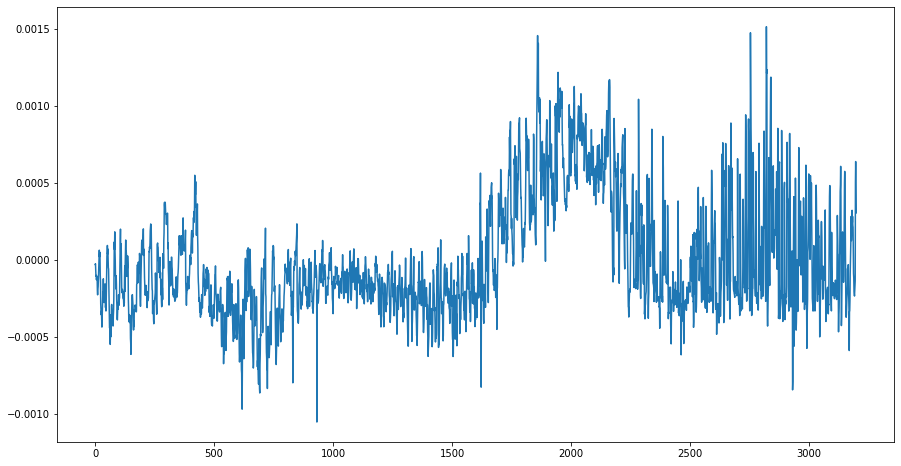

In [ ]:
# Create a line plot for the first star in the 'norm_train_df' DataFrame
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
star_0_value = norm_train_df.iloc[0, 1:] 
x_value = np.arange(1,3198)
plt.plot(x_value,star_0_value)
plt.show()

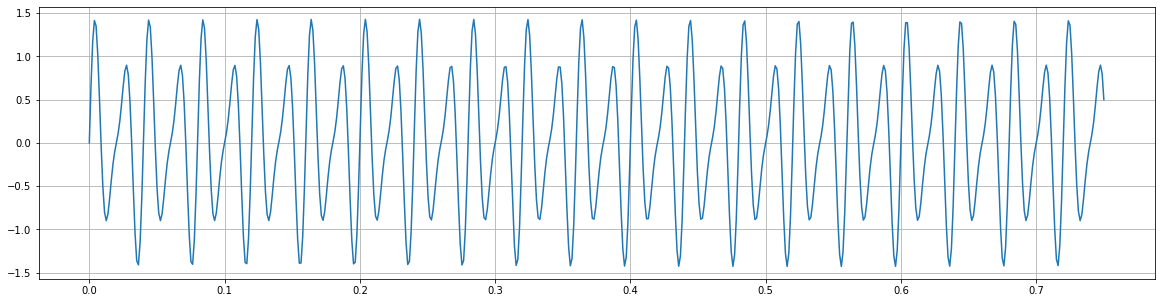

In [ ]:
# Run this code to make a line plot between the 'x' and 'y' values.
import numpy as np
import matplotlib.pyplot as plt

N = 600 # Number of sample points
T = 1.0 / 800.0 # sample spacing

t = np.linspace(0.0, N*T, N)
y = np.sin(50.0 * 2.0 * np.pi * t) + 0.5 * np.sin(75.0 * 2.0 * np.pi * t)

plt.figure(figsize=(20, 5))
plt.plot(t, y)
plt.grid()
plt.show()

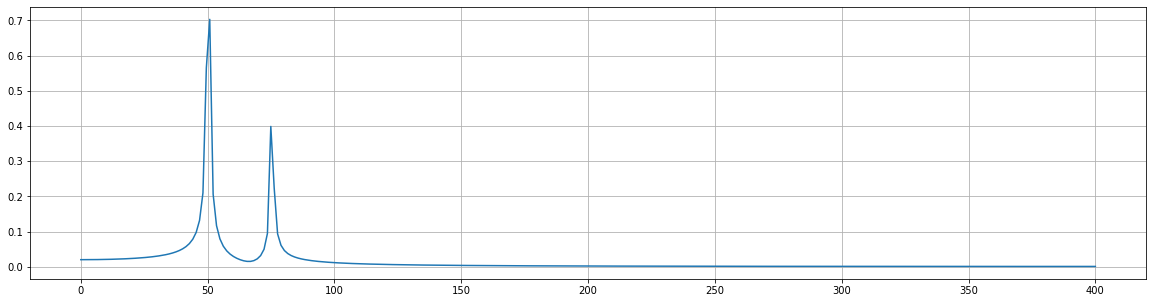

In [ ]:
# Run this code to make a line plot between the 'xf' and 'yf' values.
yf = np.fft.fft(y)
tf = np.linspace(0.0, 1.0/(2.0*T), N//2)

plt.figure(figsize=(20, 5))
plt.plot(tf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid() 
plt.show()

In [ ]:
# Applying the 'fft.fft()' function on the 'star_0' Pandas series.
fft_star_0 = np.abs(np.fft.fft(star_0_value))
fft_star_0

array([0.02630688, 0.43140175, 0.27064993, ..., 0.28983326, 0.27064993,
       0.43140175])

In [ ]:
# Applying the 'fft.fftfreq()' function on 'len(star_0)' to get the frequencies of the 'star_0' Pandas series.
freq = np.fft.fftfreq(len(star_0_value))
freq

array([ 0.        ,  0.00031279,  0.00062559, ..., -0.00093838,
       -0.00062559, -0.00031279])

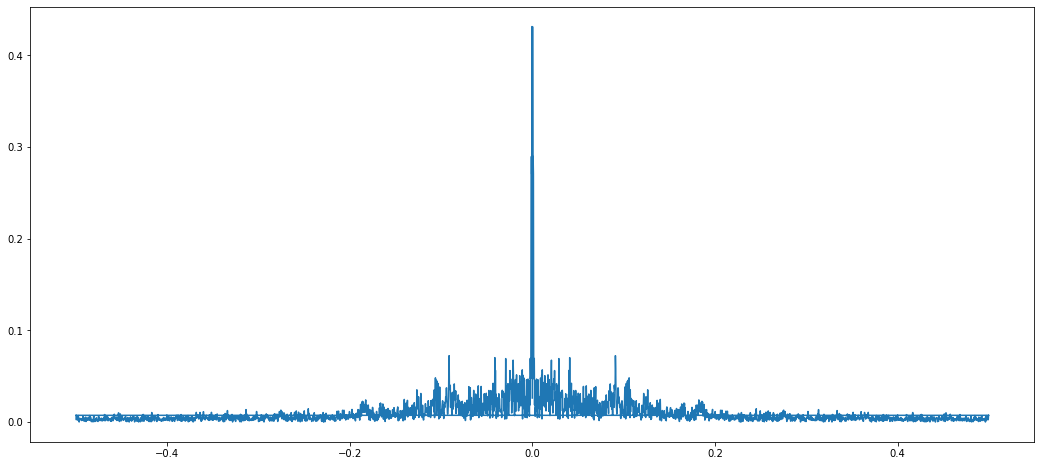

In [ ]:
# Creating a line plot between the 'fft_star_0' and 'freq' values.
plt.figure(figsize=(18,8))
plt.plot(freq,fft_star_0)
plt.show()

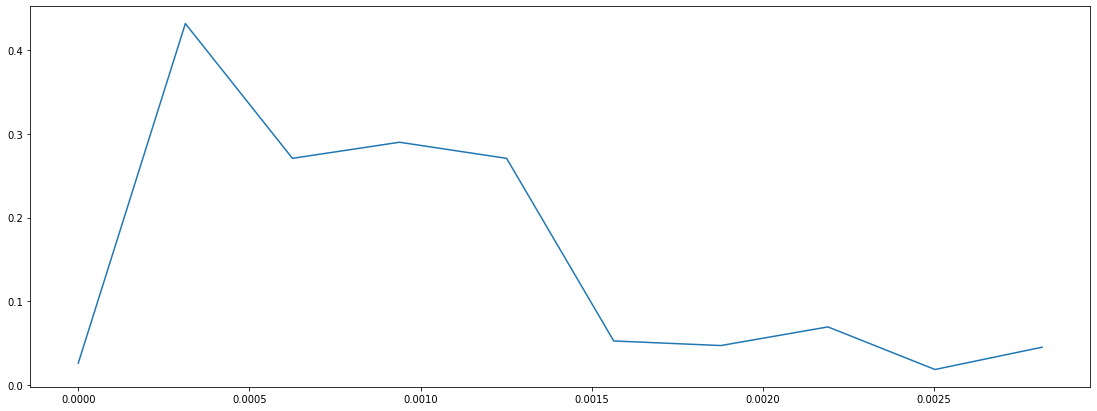

In [ ]:
# Plot a line plot between the 'fft_star_0' and 'freq' values for the first 10 values only.
plt.figure(figsize=(19,7))
plt.plot(freq[:10],fft_star_0[:10])
plt.show()

In [ ]:
# Student Action: Create a function and name it 'fast_fourier_transformation()' to apply Fast Fourier Transformation on the DataFrames.
def fast_fourier_transformation(star):
  fft_star = np.fft.fft(star,len(star))
  return np.abs(fft_star)
  
fast_fourier_transformation(star_0_value)  

array([0.02630688, 0.43140175, 0.27064993, ..., 0.28983326, 0.27064993,
       0.43140175])

In [ ]:
# Applying the 'fast_fourier_transform' function on the transposed 'norm_train_df' DataFrame.
# Here, we first take the transpose of the DataFrame and then apply the fast_fourier_transform vertically. So axis = 0 is specified here.
x_train_df_T = norm_train_df.iloc[:,1:].T.apply(fast_fourier_transformation,axis=0)
# After transforming the 'FLUX' values, we again take the transpose.
x_train_df_T = x_train_df_T.T
# Print the first five rows of the transformed DataFrame.
x_train_df_T.head()

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,FLUX.11,FLUX.12,FLUX.13,FLUX.14,FLUX.15,FLUX.16,FLUX.17,FLUX.18,FLUX.19,FLUX.20,FLUX.21,FLUX.22,FLUX.23,FLUX.24,FLUX.25,FLUX.26,FLUX.27,FLUX.28,FLUX.29,FLUX.30,FLUX.31,FLUX.32,FLUX.33,FLUX.34,FLUX.35,FLUX.36,FLUX.37,FLUX.38,FLUX.39,FLUX.40,...,FLUX.3158,FLUX.3159,FLUX.3160,FLUX.3161,FLUX.3162,FLUX.3163,FLUX.3164,FLUX.3165,FLUX.3166,FLUX.3167,FLUX.3168,FLUX.3169,FLUX.3170,FLUX.3171,FLUX.3172,FLUX.3173,FLUX.3174,FLUX.3175,FLUX.3176,FLUX.3177,FLUX.3178,FLUX.3179,FLUX.3180,FLUX.3181,FLUX.3182,FLUX.3183,FLUX.3184,FLUX.3185,FLUX.3186,FLUX.3187,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,0.026307,0.431402,0.270650,0.289833,0.270583,0.052762,0.047270,0.069514,0.018697,0.045286,0.006460,0.015506,0.016548,0.030849,0.012589,0.046994,0.027692,0.014137,0.004800,0.042211,0.046218,0.034637,0.016950,0.014880,0.027955,0.005205,0.014257,0.020662,0.014332,0.048103,0.036694,0.028986,0.036178,0.051228,0.003507,0.057038,0.041000,0.041707,0.034433,0.017863,...,0.043224,0.017863,0.034433,0.041707,0.041000,0.057038,0.003507,0.051228,0.036178,0.028986,0.036694,0.048103,0.014332,0.020662,0.014257,0.005205,0.027955,0.014880,0.016950,0.034637,0.046218,0.042211,0.004800,0.014137,0.027692,0.046994,0.012589,0.030849,0.016548,0.015506,0.006460,0.045286,0.018697,0.069514,0.047270,0.052762,0.270583,0.289833,0.270650,0.431402
1,0.073814,0.416926,0.301387,0.268391,0.083407,0.055622,0.043686,0.056498,0.015352,0.007986,0.010586,0.014127,0.028764,0.014759,0.018930,0.027356,0.011212,0.004955,0.010938,0.012245,0.027211,0.023295,0.014119,0.024274,0.015556,0.016920,0.010816,0.018247,0.008373,0.024526,0.036309,0.009519,0.015925,0.014676,0.002727,0.026992,0.026904,0.007163,0.022499,0.010011,...,0.014117,0.010011,0.022499,0.007163,0.026904,0.026992,0.002727,0.014676,0.015925,0.009519,0.036309,0.024526,0.008373,0.018247,0.010816,0.016920,0.015556,0.024274,0.014119,0.023295,0.027211,0.012245,0.010938,0.004955,0.011212,0.027356,0.018930,0.014759,0.028764,0.014127,0.010586,0.007986,0.015352,0.056498,0.043686,0.055622,0.083407,0.268391,0.301387,0.416926
2,0.037370,0.501486,0.287593,0.608851,0.138172,0.168894,0.098255,0.074512,0.032144,0.129349,0.031220,0.041158,0.058615,0.056045,0.056005,0.035264,0.040013,0.030144,0.011512,0.034705,0.014592,0.055893,0.043715,0.041822,0.039183,0.033989,0.050924,0.006486,0.027007,0.063470,0.048469,0.067830,0.038989,0.009313,0.067010,0.029310,0.036105,0.041784,0.037853,0.032605,...,0.072053,0.032605,0.037853,0.041784,0.036105,0.029310,0.067010,0.009313,0.038989,0.067830,0.048469,0.063470,0.027007,0.006486,0.050924,0.033989,0.039183,0.041822,0.043715,0.055893,0.014592,0.034705,0.011512,0.030144,0.040013,0.035264,0.056005,0.056045,0.058615,0.041158,0.031220,0.129349,0.032144,0.074512,0.098255,0.168894,0.138172,0.608851,0.287593,0.501486
3,0.072456,0.410825,0.317721,0.306138,0.016500,0.199548,0.043556,0.030622,0.041054,0.013921,0.031979,0.032475,0.017610,0.013582,0.028900,0.048027,0.015263,0.009688,0.009439,0.016608,0.032600,0.025747,0.014608,0.017199,0.026749,0.001620,0.015971,0.011299,0.009951,0.021718,0.018083,0.018330,0.018173,0.029496,0.003779,0.017428,0.022055,0.008237,0.005880,0.005578,...,0.011708,0.005578,0.005880,0.008237,0.022055,0.017428,0.003779,0.029496,0.018173,0.018330,0.018083,0.021718,0.009951,0.011299,0.015971,0.001620,0.026749,0.017199,0.014608,0.025747,0.032600,0.016608,0.009439,0.009688,0.015263,0.048027,0.028900,0.013582,0.017610,0.032475,0.031979,0.013921,0.041054,0.030622,0.043556,0.199548,0.016500,0.306138,0.317721,0.410825
4,0.043545,0.759005,0.318541,0.229686,0.442088,0.387418,0.323451,0.130178,0.212596,0.262286,0.040632,0.036485,0.038562,0.101336,0.039837,0.067423,0.029683,0.027578,0.022516,0.043156,0.055021,0.030291,0.028106,0.039674,0.056890,0.009745,0.038256,0.016722,0.012048,0.064091,0.066107,0.049496,0.033001,0.013248,0.043638,0.020835,0.014926,0.034766,0.063488,0.032794,...,0.021258,0.032

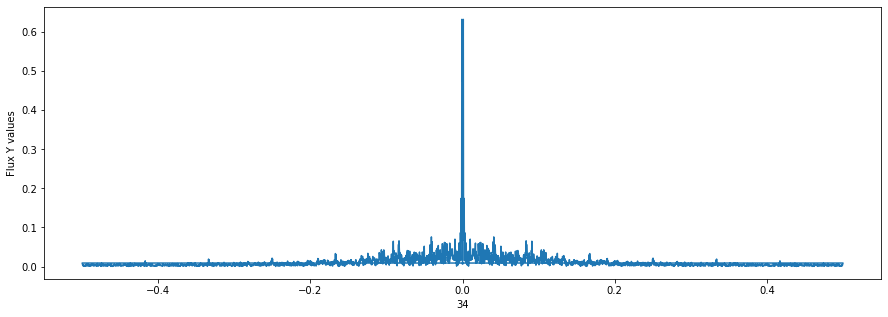

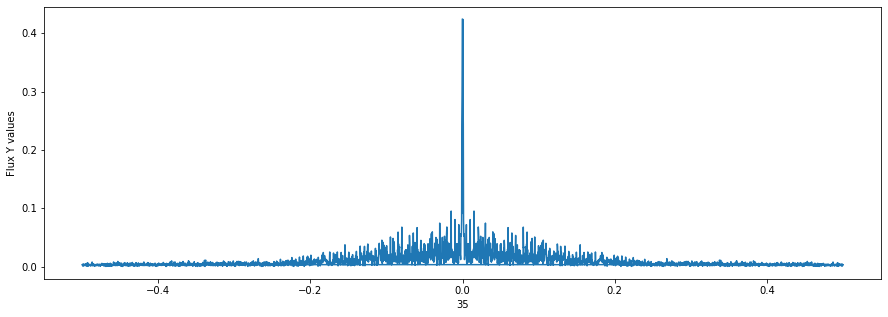

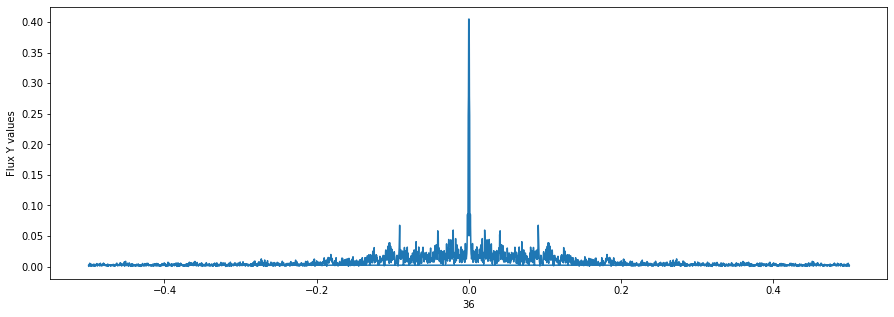

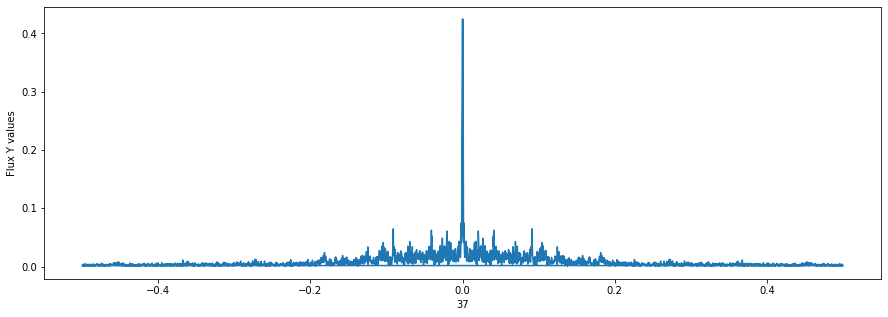

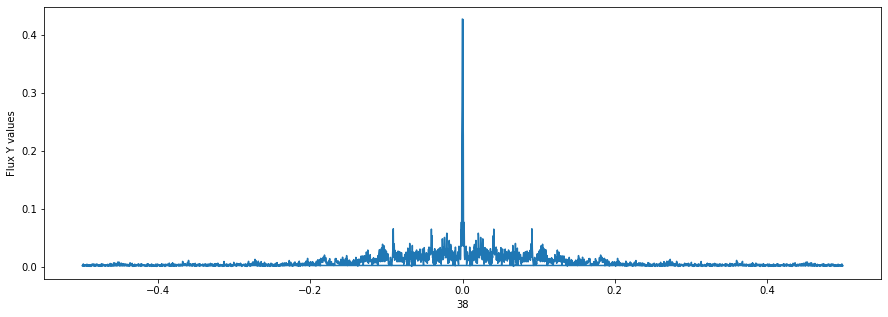

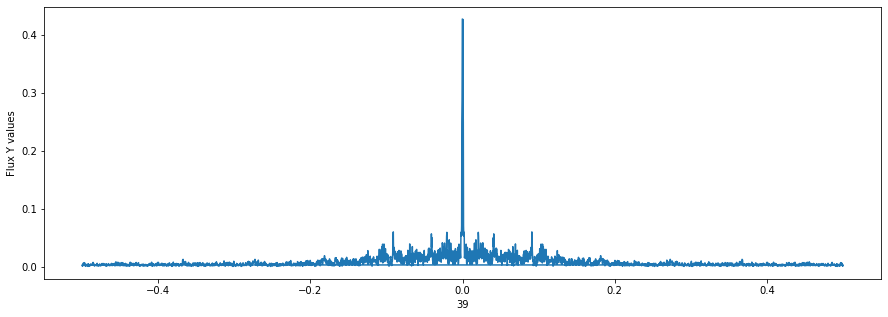

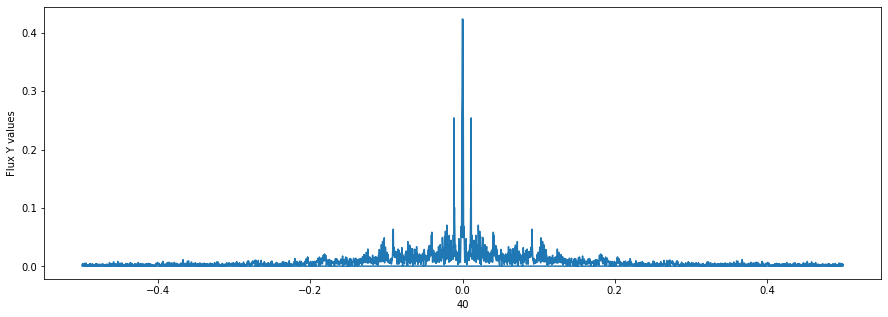

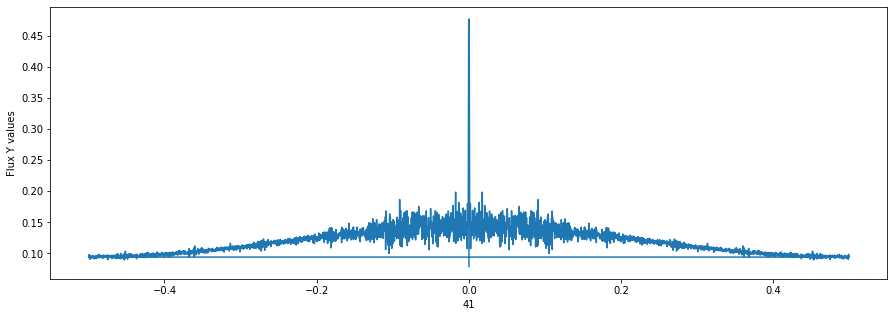

In [ ]:
# Creating line plots for the transformed Pandas series for the stars 34 to 41 in the 'x_fft_train' DataFrame.
for i in range (34,42):
    plt.figure(figsize=(15,5))
    plt.xlabel(str(i))
    plt.ylabel("Flux Y values")
    plt.plot(freq, x_train_df_T.iloc[i,:])
    plt.show()

In [ ]:
# Applying the 'fast_fourier_transform()' function on the transposed 'norm_test_df' DataFrame.
x_test = norm_test_df.iloc[:,1:].T.apply(fast_fourier_transformation,axis=0)
x_test_T = x_test.T
x_test_T

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,FLUX.11,FLUX.12,FLUX.13,FLUX.14,FLUX.15,FLUX.16,FLUX.17,FLUX.18,FLUX.19,FLUX.20,FLUX.21,FLUX.22,FLUX.23,FLUX.24,FLUX.25,FLUX.26,FLUX.27,FLUX.28,FLUX.29,FLUX.30,FLUX.31,FLUX.32,FLUX.33,FLUX.34,FLUX.35,FLUX.36,FLUX.37,FLUX.38,FLUX.39,FLUX.40,...,FLUX.3158,FLUX.3159,FLUX.3160,FLUX.3161,FLUX.3162,FLUX.3163,FLUX.3164,FLUX.3165,FLUX.3166,FLUX.3167,FLUX.3168,FLUX.3169,FLUX.3170,FLUX.3171,FLUX.3172,FLUX.3173,FLUX.3174,FLUX.3175,FLUX.3176,FLUX.3177,FLUX.3178,FLUX.3179,FLUX.3180,FLUX.3181,FLUX.3182,FLUX.3183,FLUX.3184,FLUX.3185,FLUX.3186,FLUX.3187,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,5.126298e-15,23.184733,40.545472,17.994173,13.772498,16.594294,17.532422,8.094149,8.045917,9.549431,7.981027,5.287100,12.370191,8.395335,8.553800,4.309482,7.490986,10.080278,8.053845,4.251019,4.045196,4.938889,4.448891,6.867339,8.095095,3.053256,8.820256,7.712783,10.136966,8.355963,5.958016,9.640472,10.699294,6.819834,8.876643,6.950734,4.831057,5.636601,1.145892,6.599601,...,5.130651,6.599601,1.145892,5.636601,4.831057,6.950734,8.876643,6.819834,10.699294,9.640472,5.958016,8.355963,10.136966,7.712783,8.820256,3.053256,8.095095,6.867339,4.448891,4.938889,4.045196,4.251019,8.053845,10.080278,7.490986,4.309482,8.553800,8.395335,12.370191,5.287100,7.981027,9.549431,8.045917,8.094149,17.532422,16.594294,13.772498,17.994173,40.545472,23.184733
1,3.980211e-14,135.637702,42.680618,28.017660,17.672923,16.099550,62.999485,27.005547,26.735149,29.708628,9.883983,34.277524,72.281651,24.528767,4.534815,12.675589,15.834146,18.067399,13.654873,13.552821,21.800119,9.411672,0.903089,4.953368,4.798063,15.421308,8.244732,13.001946,4.563079,6.663124,1.724316,21.652624,15.739841,15.593781,5.901540,14.276665,11.181695,3.118744,8.458737,15.851903,...,23.188351,15.851903,8.458737,3.118744,11.181695,14.276665,5.901540,15.593781,15.739841,21.652624,1.724316,6.663124,4.563079,13.001946,8.244732,15.421308,4.798063,4.953368,0.903089,9.411672,21.800119,13.552821,13.654873,18.067399,15.834146,12.675589,4.534815,24.528767,72.281651,34.277524,9.883983,29.708628,26.735149,27.005547,62.999485,16.099550,17.672923,28.017660,42.680618,135.637702
2,2.581991e-14,101.624620,26.553454,11.634754,11.720122,46.153088,23.677302,22.208643,14.393021,3.278532,7.742408,9.010245,11.050290,15.234191,14.793277,7.146753,9.825702,4.178862,17.689056,5.301253,0.838855,5.453207,8.119005,6.874388,4.943019,4.889046,9.891267,2.335758,0.634175,9.118097,10.735174,15.531430,17.775452,5.374194,13.646464,2.894904,5.909334,6.081466,17.896810,5.259022,...,2.926198,5.259022,17.896810,6.081466,5.909334,2.894904,13.646464,5.374194,17.775452,15.531430,10.735174,9.118097,0.634175,2.335758,9.891267,4.889046,4.943019,6.874388,8.119005,5.453207,0.838855,5.301253,17.689056,4.178862,9.825702,7.146753,14.793277,15.234191,11.050290,9.010245,7.742408,3.278532,14.393021,22.208643,23.677302,46.153088,11.720122,11.634754,26.553454,101.624620
3,4.574132e-14,37.305651,20.537365,5.108229,16.309293,20.286675,18.969927,6.010526,8.763040,6.370417,16.668561,18.211277,3.796749,14.614066,12.865043,15.193305,4.960198,4.656041,5.049559,20.808633,19.072745,17.983037,55.100406,7.533258,3.688735,9.832614,2.530170,2.220069,6.144516,2.746874,6.569176,16.597156,11.903331,4.207380,7.016571,6.786262,14.311839,7.601058,3.766341,15.346786,...,3.619052,15.346786,3.766341,7.601058,14.311839,6.786262,7.016571,4.207380,11.903331,16.597156,6.569176,2.746874,6.144516,2.220069,2.530170,9.832614,3.688735,7.533258,55.100406,17.983037,19.072745,20.808633,5.049559,4.656041,4.960198,15.193305,12.865043,14.614066,3.796749,18.211277,16.668561,6.370417,8.763040,6.010526,18.969927,20.286675,16.309293,5.108229,20.537365,37.305651
4,2.879381e-14,7.138386,11.941614,12.808132,27.841397,39.681676,17.985758,30.233859,14.800046,8.501530,5.167375,6.483161,7.324964,6.815963,5.151272,11.916397,16.422263,15.649583,10.678073,8.039292,5.185997,1.507619,1.

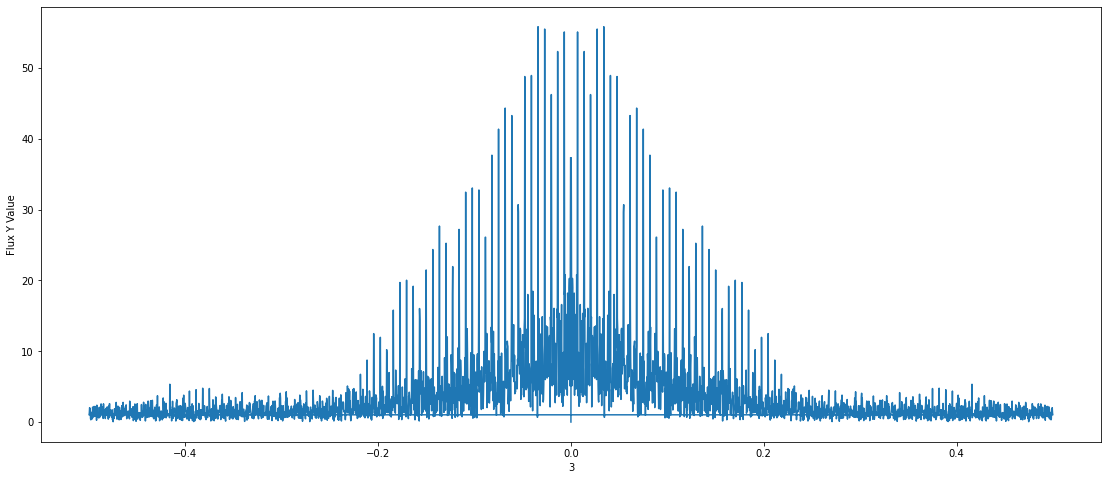

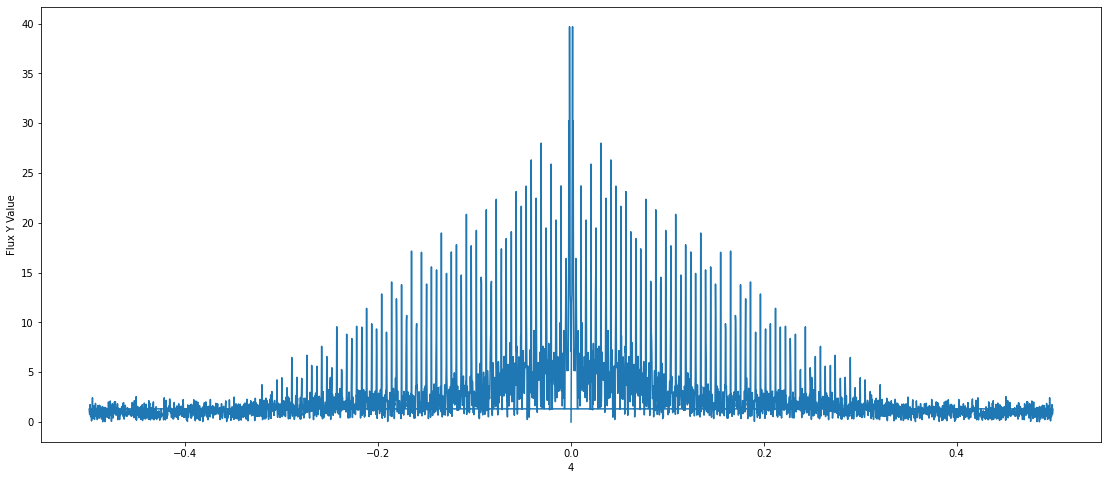

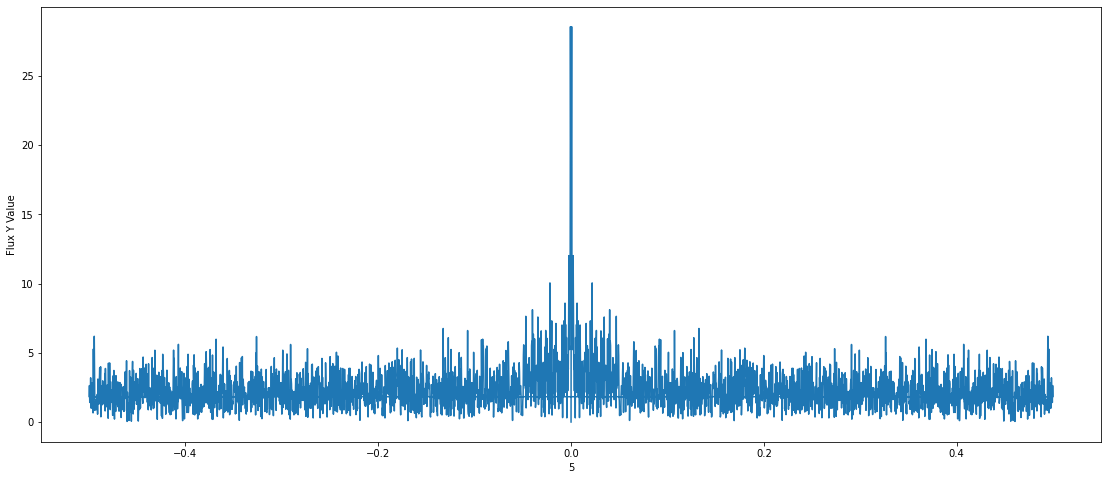

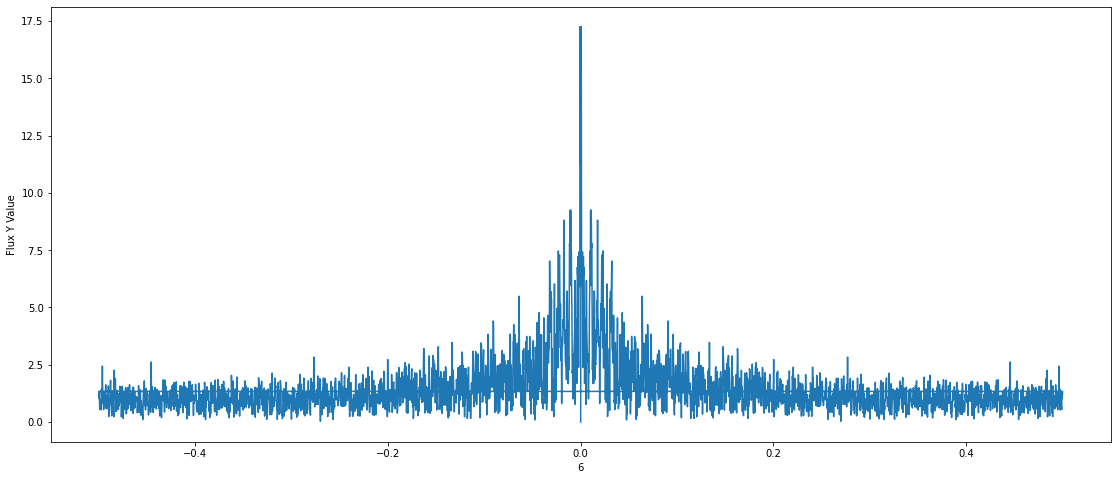

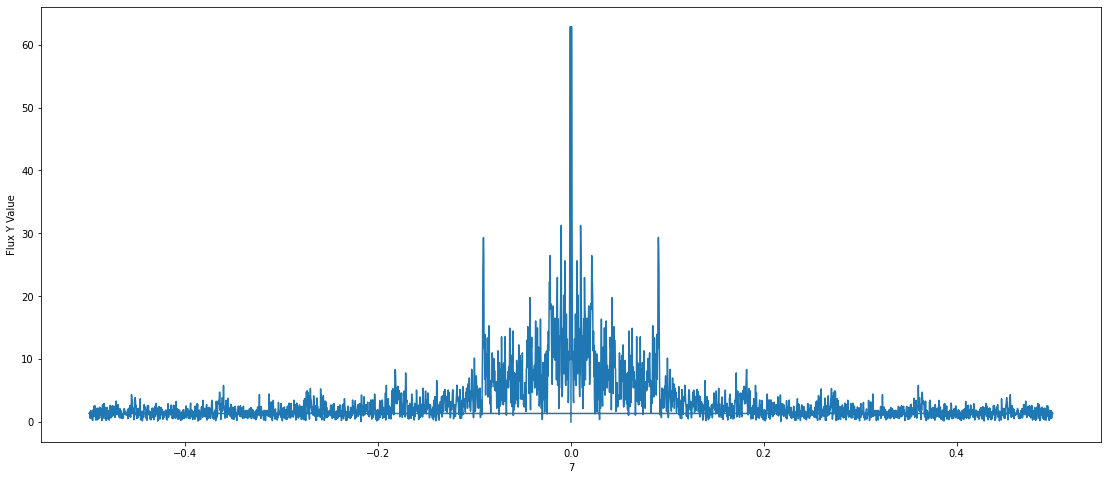

In [ ]:
# Plot the line plots for the stars in the rows '3' to '7'  in the transformed test DataFrame.
for i in range(3,8):
  plt.figure(figsize=(19,8))
  plt.xlabel(str(i))
  plt.ylabel('Flux Y Value')
  plt.plot(freq,x_test_T.iloc[i,:])
  plt.show()

In [ ]:
# Applying the 'mean_normalise()' function horizontally on the training DataFrame.
norm_train_df = exo_train_df.iloc[:, 1:].apply(mean_normalise, axis=1)
norm_train_df.head()

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,FLUX.11,FLUX.12,FLUX.13,FLUX.14,FLUX.15,FLUX.16,FLUX.17,FLUX.18,FLUX.19,FLUX.20,FLUX.21,FLUX.22,FLUX.23,FLUX.24,FLUX.25,FLUX.26,FLUX.27,FLUX.28,FLUX.29,FLUX.30,FLUX.31,FLUX.32,FLUX.33,FLUX.34,FLUX.35,FLUX.36,FLUX.37,FLUX.38,FLUX.39,FLUX.40,...,FLUX.3158,FLUX.3159,FLUX.3160,FLUX.3161,FLUX.3162,FLUX.3163,FLUX.3164,FLUX.3165,FLUX.3166,FLUX.3167,FLUX.3168,FLUX.3169,FLUX.3170,FLUX.3171,FLUX.3172,FLUX.3173,FLUX.3174,FLUX.3175,FLUX.3176,FLUX.3177,FLUX.3178,FLUX.3179,FLUX.3180,FLUX.3181,FLUX.3182,FLUX.3183,FLUX.3184,FLUX.3185,FLUX.3186,FLUX.3187,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,0.053834,0.047391,0.006510,-0.023699,-0.031772,-0.086410,-0.093128,-0.068161,-0.057650,-0.109164,-0.139515,-0.105769,-0.117852,-0.100430,-0.083555,-0.072383,-0.069726,-0.037457,-0.061937,-0.006926,-0.022974,-0.049629,-0.029840,-0.062219,-0.069091,-0.090825,-0.092884,-0.126360,-0.163160,-0.151251,-0.153715,-0.169038,-0.099904,-0.099904,0.013165,-0.117647,-0.126739,-0.130153,-0.123659,-0.132148,...,-0.113989,-0.042873,-0.001536,0.017611,-0.058446,-0.019285,-0.025855,-0.212030,-0.212030,-0.191009,-0.231774,-0.051349,-0.131090,-0.074706,-0.015884,0.034122,0.077049,0.042656,0.078249,-0.130332,-0.130332,-0.063663,-0.017655,-0.017494,0.074220,0.037805,0.057786,-0.012547,-0.022679,-0.016981,-0.056482,-0.071934,-0.071934,0.009738,0.024779,0.052993,0.018843,0.033024,-0.003127,-0.031759
1,-0.050411,-0.042317,-0.081922,-0.052351,-0.115212,-0.104794,-0.126816,-0.124861,-0.122681,-0.105708,-0.126752,-0.108256,-0.105339,-0.126143,-0.110821,-0.086298,-0.047767,-0.065878,-0.037717,-0.001141,0.003026,0.037214,0.085169,0.028911,0.077075,0.038672,0.036236,0.031107,-0.314584,0.042567,0.042567,0.042567,0.042567,0.042567,0.039185,-0.001718,-0.010325,-0.034736,-0.043054,-0.027652,...,-0.046997,-0.012922,-0.009316,0.044699,0.009549,0.011264,0.056463,-0.081377,-0.081377,-0.103560,-0.081073,-0.037653,-0.009604,-0.010502,0.003202,0.025866,0.014790,0.070552,-0.003802,-0.019397,-0.019397,-0.027075,-0.026369,-0.041099,-0.002568,0.017916,0.030514,-0.008386,0.002786,0.031988,0.006648,-0.039721,-0.039721,-0.027988,0.004116,0.013124,-0.006847,0.022260,0.037550,0.043849
2,0.243983,0.245509,0.235186,0.227365,0.208538,0.212981,0.212283,0.222467,0.199285,0.221536,0.214684,0.211260,0.225183,0.201444,0.220969,0.220089,0.245225,0.254078,0.258014,0.247472,0.264313,0.252836,0.255171,0.252459,0.264773,0.257679,0.265071,0.243066,0.253580,0.246630,0.241438,0.243918,0.123501,0.123501,0.132215,0.135029,0.113722,0.104855,0.075933,0.100408,...,-0.027578,-0.019301,-0.032434,-0.045498,-0.035989,-0.044037,-0.069363,-0.042981,-0.042981,-0.045256,-0.029601,-0.032211,-0.017380,-0.033490,-0.030611,-0.002554,-0.018348,-0.025717,-0.006848,0.002703,0.002703,-0.015463,-0.020083,-0.018734,-0.011746,-0.016729,-0.000153,-0.036733,-0.033788,-0.042809,-0.037161,0.002382,0.002382,-0.017715,-0.013523,-0.001456,-0.009299,-0.017259,-0.036384,-0.048782
3,0.518501,0.551177,0.480659,0.474051,0.504754,0.496863,0.511941,0.494687,0.496425,0.513506,0.494421,0.517984,0.497505,0.498726,0.505099,0.525390,0.541329,0.571828,0.587031,0.586123,0.538041,0.533719,0.507212,0.510735,0.489536,0.472000,0.444632,0.439058,0.460806,0.447748,0.454073,0.448593,0.146229,0.146229,0.113287,0.123856,0.115839,0.127065,0.132937,0.117358,...,0.002969,0.029649,-0.014926,-0.032086,-0.013752,-0.015803,0.010782,-0.041371,-0.041371,-0.071432,-0.054131,-0.073091,-0.021737,0.004159,0.023605,0.004191,-0.016711,-0.029331,-0.036110,-0.049277,-0.049277,-0.017228,0.017656,0.023965,-0.006143,-0.005704,-0.027013,-0.033119,-0.039476,0.018892,0.016215,0.001435,0.001435,0.054324,0.038636,-0.012562,-0.006456,-0.019827,-0.019889,0.029163
4,-0.399904,-0.401872,-0.404199,-0.395473,-0.381734,-0.373293,-0.360070,-0.368986,-0.356861,-0.350022,-0.336272,-0.320243,-0.319939,-0.307239,-0.287833,-0.270844,-0.257219,-0.232375,-0.216411,-0.205402,-0.187

In [ ]:
# Inserting the 'LABEL' column to the 'norm_train_df' DataFrame.
norm_train_df.insert(loc=0, column='LABEL', value=exo_train_df['LABEL'])
norm_train_df.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,FLUX.11,FLUX.12,FLUX.13,FLUX.14,FLUX.15,FLUX.16,FLUX.17,FLUX.18,FLUX.19,FLUX.20,FLUX.21,FLUX.22,FLUX.23,FLUX.24,FLUX.25,FLUX.26,FLUX.27,FLUX.28,FLUX.29,FLUX.30,FLUX.31,FLUX.32,FLUX.33,FLUX.34,FLUX.35,FLUX.36,FLUX.37,FLUX.38,FLUX.39,...,FLUX.3158,FLUX.3159,FLUX.3160,FLUX.3161,FLUX.3162,FLUX.3163,FLUX.3164,FLUX.3165,FLUX.3166,FLUX.3167,FLUX.3168,FLUX.3169,FLUX.3170,FLUX.3171,FLUX.3172,FLUX.3173,FLUX.3174,FLUX.3175,FLUX.3176,FLUX.3177,FLUX.3178,FLUX.3179,FLUX.3180,FLUX.3181,FLUX.3182,FLUX.3183,FLUX.3184,FLUX.3185,FLUX.3186,FLUX.3187,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,0.053834,0.047391,0.006510,-0.023699,-0.031772,-0.086410,-0.093128,-0.068161,-0.057650,-0.109164,-0.139515,-0.105769,-0.117852,-0.100430,-0.083555,-0.072383,-0.069726,-0.037457,-0.061937,-0.006926,-0.022974,-0.049629,-0.029840,-0.062219,-0.069091,-0.090825,-0.092884,-0.126360,-0.163160,-0.151251,-0.153715,-0.169038,-0.099904,-0.099904,0.013165,-0.117647,-0.126739,-0.130153,-0.123659,...,-0.113989,-0.042873,-0.001536,0.017611,-0.058446,-0.019285,-0.025855,-0.212030,-0.212030,-0.191009,-0.231774,-0.051349,-0.131090,-0.074706,-0.015884,0.034122,0.077049,0.042656,0.078249,-0.130332,-0.130332,-0.063663,-0.017655,-0.017494,0.074220,0.037805,0.057786,-0.012547,-0.022679,-0.016981,-0.056482,-0.071934,-0.071934,0.009738,0.024779,0.052993,0.018843,0.033024,-0.003127,-0.031759
1,2,-0.050411,-0.042317,-0.081922,-0.052351,-0.115212,-0.104794,-0.126816,-0.124861,-0.122681,-0.105708,-0.126752,-0.108256,-0.105339,-0.126143,-0.110821,-0.086298,-0.047767,-0.065878,-0.037717,-0.001141,0.003026,0.037214,0.085169,0.028911,0.077075,0.038672,0.036236,0.031107,-0.314584,0.042567,0.042567,0.042567,0.042567,0.042567,0.039185,-0.001718,-0.010325,-0.034736,-0.043054,...,-0.046997,-0.012922,-0.009316,0.044699,0.009549,0.011264,0.056463,-0.081377,-0.081377,-0.103560,-0.081073,-0.037653,-0.009604,-0.010502,0.003202,0.025866,0.014790,0.070552,-0.003802,-0.019397,-0.019397,-0.027075,-0.026369,-0.041099,-0.002568,0.017916,0.030514,-0.008386,0.002786,0.031988,0.006648,-0.039721,-0.039721,-0.027988,0.004116,0.013124,-0.006847,0.022260,0.037550,0.043849
2,2,0.243983,0.245509,0.235186,0.227365,0.208538,0.212981,0.212283,0.222467,0.199285,0.221536,0.214684,0.211260,0.225183,0.201444,0.220969,0.220089,0.245225,0.254078,0.258014,0.247472,0.264313,0.252836,0.255171,0.252459,0.264773,0.257679,0.265071,0.243066,0.253580,0.246630,0.241438,0.243918,0.123501,0.123501,0.132215,0.135029,0.113722,0.104855,0.075933,...,-0.027578,-0.019301,-0.032434,-0.045498,-0.035989,-0.044037,-0.069363,-0.042981,-0.042981,-0.045256,-0.029601,-0.032211,-0.017380,-0.033490,-0.030611,-0.002554,-0.018348,-0.025717,-0.006848,0.002703,0.002703,-0.015463,-0.020083,-0.018734,-0.011746,-0.016729,-0.000153,-0.036733,-0.033788,-0.042809,-0.037161,0.002382,0.002382,-0.017715,-0.013523,-0.001456,-0.009299,-0.017259,-0.036384,-0.048782
3,2,0.518501,0.551177,0.480659,0.474051,0.504754,0.496863,0.511941,0.494687,0.496425,0.513506,0.494421,0.517984,0.497505,0.498726,0.505099,0.525390,0.541329,0.571828,0.587031,0.586123,0.538041,0.533719,0.507212,0.510735,0.489536,0.472000,0.444632,0.439058,0.460806,0.447748,0.454073,0.448593,0.146229,0.146229,0.113287,0.123856,0.115839,0.127065,0.132937,...,0.002969,0.029649,-0.014926,-0.032086,-0.013752,-0.015803,0.010782,-0.041371,-0.041371,-0.071432,-0.054131,-0.073091,-0.021737,0.004159,0.023605,0.004191,-0.016711,-0.029331,-0.036110,-0.049277,-0.049277,-0.017228,0.017656,0.023965,-0.006143,-0.005704,-0.027013,-0.033119,-0.039476,0.018892,0.016215,0.001435,0.001435,0.054324,0.038636,-0.012562,-0.006456,-0.019827,-0.019889,0.029163
4,2,-0.399904,-0.401872,-0.404199,-0.395473,-0.381734,-0.373293,-0.360070,-0.368986,-0.356861,-0.350022,-0.336272,-0.320243,-0.319939,-0.307239,-0.287833,-0.270844,-0.257219,-0.232375,-0.216411,-0.205402,-0.187382,-0.174118,-0.162633,-0.158

In [ ]:
# Applying the 'mean_normalise()' function on the testing DataFrame. 
norm_test_df = exo_test_df.iloc[:, 1:].apply(mean_normalise, axis=1)
norm_test_df.head()

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,FLUX.11,FLUX.12,FLUX.13,FLUX.14,FLUX.15,FLUX.16,FLUX.17,FLUX.18,FLUX.19,FLUX.20,FLUX.21,FLUX.22,FLUX.23,FLUX.24,FLUX.25,FLUX.26,FLUX.27,FLUX.28,FLUX.29,FLUX.30,FLUX.31,FLUX.32,FLUX.33,FLUX.34,FLUX.35,FLUX.36,FLUX.37,FLUX.38,FLUX.39,FLUX.40,...,FLUX.3158,FLUX.3159,FLUX.3160,FLUX.3161,FLUX.3162,FLUX.3163,FLUX.3164,FLUX.3165,FLUX.3166,FLUX.3167,FLUX.3168,FLUX.3169,FLUX.3170,FLUX.3171,FLUX.3172,FLUX.3173,FLUX.3174,FLUX.3175,FLUX.3176,FLUX.3177,FLUX.3178,FLUX.3179,FLUX.3180,FLUX.3181,FLUX.3182,FLUX.3183,FLUX.3184,FLUX.3185,FLUX.3186,FLUX.3187,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,0.273347,0.228221,0.196676,0.110003,0.104130,0.088690,0.040926,0.014337,0.013534,-0.052079,-0.054832,-0.068804,-0.079655,-0.016015,-0.066188,-0.064169,-0.075732,-0.029872,-0.039691,-0.056415,-0.014730,0.019521,0.079812,0.184609,0.265570,0.305717,0.340084,0.397851,0.429097,0.492255,0.564521,-0.131709,-0.131709,-0.131709,-0.121087,-0.073988,-0.073140,-0.113012,-0.090988,-0.061462,...,-0.007527,0.026450,-0.017873,-0.055658,0.004151,0.067630,0.087497,-0.054121,-0.054121,-0.011702,0.003531,-0.039003,-0.072428,-0.018217,-0.011473,0.029524,0.034158,0.071645,0.112779,0.197754,0.197754,0.096949,0.110186,0.050676,0.073549,0.068892,0.031703,0.023376,0.050355,0.011882,0.031635,0.042578,0.031451,-0.005393,0.028904,0.102708,0.071576,0.080408,0.616438,0.130742
1,0.394038,0.391480,0.392680,0.390974,0.388955,0.386673,0.386340,0.382364,0.381035,0.374634,0.365595,0.355955,0.344779,0.326513,0.302050,0.288028,0.267479,0.245166,0.225696,0.204367,0.188959,0.166178,0.151080,0.129661,0.115564,0.104075,0.103383,0.102889,0.109362,0.131452,0.162766,0.195175,0.262094,0.262094,0.254659,0.234561,0.217038,0.197559,0.181571,0.166160,...,-0.249097,-0.321740,-0.356853,-0.260644,-0.169015,-0.194461,-0.203200,-0.047612,-0.047612,-0.059527,-0.082817,-0.103659,-0.128578,-0.147432,-0.171446,-0.182454,-0.195212,-0.200677,-0.197563,0.074878,0.074878,0.088953,0.093556,0.088384,0.073554,0.071405,0.043269,0.022604,-0.002679,-0.018935,-0.047311,-0.075404,-0.092643,-0.118456,-0.134109,-0.150638,-0.164944,-0.171944,-0.166961,-0.148790
2,0.648150,0.627582,0.591444,0.519002,0.466046,0.385214,0.340496,0.281192,0.162553,0.119260,0.069748,-0.010734,-0.022744,-0.045385,-0.006923,0.017249,-0.014986,0.051756,0.045126,0.053615,0.059758,0.081073,0.055856,0.015809,-0.007906,-0.107775,-0.171644,-0.239483,-0.306187,-0.338697,-0.107417,-0.107417,-0.107417,-0.107417,-0.122133,-0.102014,-0.068872,-0.013302,0.014956,0.056107,...,-0.022256,-0.048845,-0.022302,-0.038442,-0.052251,-0.083176,-0.002191,-0.024047,-0.024047,-0.023925,-0.074831,-0.072713,-0.077209,-0.079091,-0.091627,-0.125196,-0.085210,-0.020016,-0.048883,0.244109,0.244109,0.244109,0.118688,0.046208,0.014201,-0.097274,-0.054964,-0.035257,-0.001916,-0.010436,0.018179,-0.034769,-0.032201,-0.041117,-0.057967,-0.128412,-0.067972,-0.119374,-0.023437,0.027941
3,-0.232813,-0.233212,-0.238944,-0.235869,-0.208281,-0.220224,-0.222214,-0.208586,-0.197319,-0.188186,-0.196253,-0.200681,-0.173424,-0.181969,-0.185891,-0.183767,-0.184645,-0.182481,-0.186111,-0.177627,-0.188482,-0.170188,-0.154902,-0.142609,-0.145010,-0.157352,-0.143322,-0.143334,-0.130733,-0.128905,-0.111279,-0.097154,-0.081508,-0.068529,-0.067585,-0.071967,-0.063690,-0.062919,-0.044958,-0.036084,...,0.023932,-0.373173,-0.373173,-0.373173,-0.373173,-0.373173,-0.373173,-0.373173,-0.373173,0.014351,0.038435,0.021458,0.032712,0.049598,0.046797,0.033132,0.025102,0.028333,0.007686,0.008762,-0.002312,-0.044482,-0.066509,-0.084833,-0.083919,-0.062776,-0.055758,-0.051376,-0.020587,0.008095,0.056186,0.047254,0.047254,0.039873,0.021893,0.025227,0.025075,-0.017912,-0.059585,-0.046740
4,-0.006994,0.003426,0.006382,0.007610,0.003316,-0.000167,0.010016,-0.009471,0.008195,0.016842,0.001825,0.005384,-0.011494,0.021778,0.015523,0.011810,0.006193,0.016785,0.014291,0.024628,-0.002301,-0.002301,

In [ ]:
# Inserting the 'LABEL' column to the 'norm_test_df' DataFrame.
norm_test_df.insert(loc=0, column='LABEL', value=exo_test_df['LABEL'])
norm_test_df.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,FLUX.11,FLUX.12,FLUX.13,FLUX.14,FLUX.15,FLUX.16,FLUX.17,FLUX.18,FLUX.19,FLUX.20,FLUX.21,FLUX.22,FLUX.23,FLUX.24,FLUX.25,FLUX.26,FLUX.27,FLUX.28,FLUX.29,FLUX.30,FLUX.31,FLUX.32,FLUX.33,FLUX.34,FLUX.35,FLUX.36,FLUX.37,FLUX.38,FLUX.39,...,FLUX.3158,FLUX.3159,FLUX.3160,FLUX.3161,FLUX.3162,FLUX.3163,FLUX.3164,FLUX.3165,FLUX.3166,FLUX.3167,FLUX.3168,FLUX.3169,FLUX.3170,FLUX.3171,FLUX.3172,FLUX.3173,FLUX.3174,FLUX.3175,FLUX.3176,FLUX.3177,FLUX.3178,FLUX.3179,FLUX.3180,FLUX.3181,FLUX.3182,FLUX.3183,FLUX.3184,FLUX.3185,FLUX.3186,FLUX.3187,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,0.273347,0.228221,0.196676,0.110003,0.104130,0.088690,0.040926,0.014337,0.013534,-0.052079,-0.054832,-0.068804,-0.079655,-0.016015,-0.066188,-0.064169,-0.075732,-0.029872,-0.039691,-0.056415,-0.014730,0.019521,0.079812,0.184609,0.265570,0.305717,0.340084,0.397851,0.429097,0.492255,0.564521,-0.131709,-0.131709,-0.131709,-0.121087,-0.073988,-0.073140,-0.113012,-0.090988,...,-0.007527,0.026450,-0.017873,-0.055658,0.004151,0.067630,0.087497,-0.054121,-0.054121,-0.011702,0.003531,-0.039003,-0.072428,-0.018217,-0.011473,0.029524,0.034158,0.071645,0.112779,0.197754,0.197754,0.096949,0.110186,0.050676,0.073549,0.068892,0.031703,0.023376,0.050355,0.011882,0.031635,0.042578,0.031451,-0.005393,0.028904,0.102708,0.071576,0.080408,0.616438,0.130742
1,2,0.394038,0.391480,0.392680,0.390974,0.388955,0.386673,0.386340,0.382364,0.381035,0.374634,0.365595,0.355955,0.344779,0.326513,0.302050,0.288028,0.267479,0.245166,0.225696,0.204367,0.188959,0.166178,0.151080,0.129661,0.115564,0.104075,0.103383,0.102889,0.109362,0.131452,0.162766,0.195175,0.262094,0.262094,0.254659,0.234561,0.217038,0.197559,0.181571,...,-0.249097,-0.321740,-0.356853,-0.260644,-0.169015,-0.194461,-0.203200,-0.047612,-0.047612,-0.059527,-0.082817,-0.103659,-0.128578,-0.147432,-0.171446,-0.182454,-0.195212,-0.200677,-0.197563,0.074878,0.074878,0.088953,0.093556,0.088384,0.073554,0.071405,0.043269,0.022604,-0.002679,-0.018935,-0.047311,-0.075404,-0.092643,-0.118456,-0.134109,-0.150638,-0.164944,-0.171944,-0.166961,-0.148790
2,2,0.648150,0.627582,0.591444,0.519002,0.466046,0.385214,0.340496,0.281192,0.162553,0.119260,0.069748,-0.010734,-0.022744,-0.045385,-0.006923,0.017249,-0.014986,0.051756,0.045126,0.053615,0.059758,0.081073,0.055856,0.015809,-0.007906,-0.107775,-0.171644,-0.239483,-0.306187,-0.338697,-0.107417,-0.107417,-0.107417,-0.107417,-0.122133,-0.102014,-0.068872,-0.013302,0.014956,...,-0.022256,-0.048845,-0.022302,-0.038442,-0.052251,-0.083176,-0.002191,-0.024047,-0.024047,-0.023925,-0.074831,-0.072713,-0.077209,-0.079091,-0.091627,-0.125196,-0.085210,-0.020016,-0.048883,0.244109,0.244109,0.244109,0.118688,0.046208,0.014201,-0.097274,-0.054964,-0.035257,-0.001916,-0.010436,0.018179,-0.034769,-0.032201,-0.041117,-0.057967,-0.128412,-0.067972,-0.119374,-0.023437,0.027941
3,2,-0.232813,-0.233212,-0.238944,-0.235869,-0.208281,-0.220224,-0.222214,-0.208586,-0.197319,-0.188186,-0.196253,-0.200681,-0.173424,-0.181969,-0.185891,-0.183767,-0.184645,-0.182481,-0.186111,-0.177627,-0.188482,-0.170188,-0.154902,-0.142609,-0.145010,-0.157352,-0.143322,-0.143334,-0.130733,-0.128905,-0.111279,-0.097154,-0.081508,-0.068529,-0.067585,-0.071967,-0.063690,-0.062919,-0.044958,...,0.023932,-0.373173,-0.373173,-0.373173,-0.373173,-0.373173,-0.373173,-0.373173,-0.373173,0.014351,0.038435,0.021458,0.032712,0.049598,0.046797,0.033132,0.025102,0.028333,0.007686,0.008762,-0.002312,-0.044482,-0.066509,-0.084833,-0.083919,-0.062776,-0.055758,-0.051376,-0.020587,0.008095,0.056186,0.047254,0.047254,0.039873,0.021893,0.025227,0.025075,-0.017912,-0.059585,-0.046740
4,2,-0.006994,0.003426,0.006382,0.007610,0.003316,-0.000167,0.010016,-0.009471,0.008195,0.016842,0.001825,0.005384,-0.011494,0.021778,0.015523,0.011810,0.006193,0.016785,0.014291,0.024628,-0.002301,-0.002301,0.004214,-0.003167,0.002058,-0

In [ ]:
# Transpose the 'exo_train_df' using the 'T' keyword.
exo_train_df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,5047,5048,5049,5050,5051,5052,5053,5054,5055,5056,5057,5058,5059,5060,5061,5062,5063,5064,5065,5066,5067,5068,5069,5070,5071,5072,5073,5074,5075,5076,5077,5078,5079,5080,5081,5082,5083,5084,5085,5086
LABEL,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
FLUX.1,93.85,-38.88,532.64,326.52,-1107.21,211.10,9.34,238.77,-103.54,-265.91,118.81,-239.88,70.34,424.14,-267.21,35.92,-122.30,-65.20,-66.47,560.19,-1831.31,2053.62,-48.48,145.84,207.37,304.50,150725.80,124.39,-63.50,31.29,-472.50,194.82,26.96,43.07,-248.23,22.82,26.24,-141.22,-35.62,142.40,...,3.26,5.52,223.80,-2.53,307.00,-354.25,2.10,9.27,-863.62,75.06,6.59,28.79,-83.00,9.80,89.83,159.78,11.50,-29.79,-188.62,4.67,15.62,-20.35,-2.30,3.15,462.33,-6.91,122.63,-1090.87,2.13,5.74,125.57,7.45,475.61,-46.63,299.41,-91.91,989.75,273.39,3.82,323.28
FLUX.2,83.81,-33.83,535.92,347.39,-1112.59,163.57,49.96,262.16,-118.97,-318.59,110.97,-164.28,63.86,407.71,-239.11,45.84,-122.30,-76.33,-15.50,262.94,-1781.44,2126.05,-22.95,137.82,195.04,275.94,129578.36,72.73,-49.15,25.14,-384.09,162.51,38.98,46.73,-243.59,46.37,42.32,-81.79,-28.55,137.03,...,4.11,9.28,223.44,-3.69,289.28,-347.10,9.26,8.92,-595.75,67.38,8.80,27.16,-78.50,21.49,79.95,160.60,8.02,-25.91,-214.18,-1.77,-25.58,-26.38,-11.70,1.68,383.22,-14.21,137.56,-1168.93,1.87,2.19,78.69,10.02,395.50,-55.39,302.77,-92.97,891.01,278.00,2.09,306.36
FLUX.3,20.10,-58.54,513.73,302.35,-1118.95,179.16,33.30,277.80,-108.93,-335.66,79.53,-180.91,58.37,461.59,-233.15,47.99,-131.08,-76.23,-44.59,189.94,-1930.84,2146.33,11.15,96.99,150.45,269.24,102184.98,36.85,-45.99,36.93,-330.42,126.17,25.99,29.43,-217.91,39.61,28.34,-52.28,-27.29,93.65,...,2.25,2.71,217.67,-1.26,191.08,-325.74,1.24,3.91,-425.25,33.94,-3.65,22.20,-83.66,16.65,81.44,186.23,-0.59,-25.00,-233.90,-2.53,-30.91,-21.92,-13.75,-4.79,342.29,0.10,109.06,-1154.31,-4.16,8.66,98.29,6.87,423.61,-64.88,278.68,-78.76,908.53,261.73,-3.29,293.16
FLUX.4,-26.98,-40.09,496.92,298.13,-1095.10,187.82,9.63,190.16,-72.25,-450.47,114.25,-225.69,69.43,428.17,-211.84,74.58,-109.69,-72.58,-49.03,185.12,-2016.72,2159.84,-70.04,17.09,135.34,248.51,82253.98,-4.68,-34.55,16.63,-273.41,129.70,47.28,9.75,-190.69,98.75,24.81,-32.45,-28.94,105.64,...,10.67,15.27,217.86,0.04,181.02,-310.49,6.34,4.28,-369.25,63.81,-11.99,19.47,-77.41,13.00,81.62,179.39,7.03,-25.09,-282.53,-3.44,-41.41,15.82,-6.37,-0.52,257.18,-13.02,135.08,-991.00,0.87,5.31,91.16,-2.82,376.36,-88.75,263.48,-97.33,851.83,236.99,-2.88,287.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FLUX.3193,92.54,0.76,5.06,-12.67,-438.54,19.27,-0.44,95.30,4.53,3162.53,126.14,-215.94,-10.79,138.38,-746.83,20.43,-54.25,31.26,-32.75,-165.00,326.61,2292.64,-4.93,127.98,19.46,-10.73,-13056.11,56.43,-90.38,4.79,-3410.42,-14.98,13.04,13.40,198.05,-5.38,8.49,38.66,-26.96,-39.64,...,-3.61,10.37,-36.74,6.49,7.74,164.87,1.90,-1.87,2918.12,-26.43,11.95,0.30,-58.89,15.28,85.77,-82.07,28.74,13.97,0.63,-13.11,33.58,2.67,1.31,-2.90,11.90,-10.60,-184.60,-488.62,-2.64,6.64,210.09,8.75,163.02,28.82,-74.95,151.75,-136.16,-3.47,-1.50,-25.33
FLUX.3194,39.32,-11.70,-11.80,-8.77,-399.71,-43.90,10.90,48.86,21.95,3398.28,200.36,-293.25,-4.97,190.66,-765.22,22.40,-37.13,21.71,-30.28,7.38,481.28,2454.48,26.74,67.51,9.32,3.49,379.48,-1.95,-74.36,13.26,-3

In [ ]:
# Create a function and name it 'fast_fourier_transformation()' to apply Fast Fourier Transformation on the DataFrames.
import numpy as np

def fast_fourier_transform(star):
  fft_star = np.fft.fft(star, n=len(star))
  return np.abs(fft_star)

In [ ]:
# Get a frequency array/series for both the training and test datasets.
freq = np.fft.fftfreq(len(exo_train_df.iloc[0, 1:]))
freq

array([ 0.        ,  0.00031279,  0.00062559, ..., -0.00093838,
       -0.00062559, -0.00031279])

In [ ]:
# Apply the 'fast_fourier_transform()' function on the transposed 'norm_train_df' DataFrame.
x_fft_train_T = norm_train_df.iloc[:, 1:].T.apply(fast_fourier_transform)
x_fft_train = x_fft_train_T.T
x_fft_train.head()

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,FLUX.11,FLUX.12,FLUX.13,FLUX.14,FLUX.15,FLUX.16,FLUX.17,FLUX.18,FLUX.19,FLUX.20,FLUX.21,FLUX.22,FLUX.23,FLUX.24,FLUX.25,FLUX.26,FLUX.27,FLUX.28,FLUX.29,FLUX.30,FLUX.31,FLUX.32,FLUX.33,FLUX.34,FLUX.35,FLUX.36,FLUX.37,FLUX.38,FLUX.39,FLUX.40,...,FLUX.3158,FLUX.3159,FLUX.3160,FLUX.3161,FLUX.3162,FLUX.3163,FLUX.3164,FLUX.3165,FLUX.3166,FLUX.3167,FLUX.3168,FLUX.3169,FLUX.3170,FLUX.3171,FLUX.3172,FLUX.3173,FLUX.3174,FLUX.3175,FLUX.3176,FLUX.3177,FLUX.3178,FLUX.3179,FLUX.3180,FLUX.3181,FLUX.3182,FLUX.3183,FLUX.3184,FLUX.3185,FLUX.3186,FLUX.3187,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,6.620116e-14,2.273248,35.722883,33.978236,128.816503,18.835061,16.101795,10.722037,18.488302,16.400976,1.920231,5.321160,11.332751,6.680037,12.021094,14.088651,15.247360,5.173820,7.720623,20.745046,8.957348,8.426093,14.832986,7.311026,9.442441,4.474428,5.662394,6.465002,4.272602,17.368854,8.195466,16.288997,4.299609,15.333522,8.889678,18.761014,13.248540,8.437022,11.048989,3.385416,...,11.958605,3.385416,11.048989,8.437022,13.248540,18.761014,8.889678,15.333522,4.299609,16.288997,8.195466,17.368854,4.272602,6.465002,5.662394,4.474428,9.442441,7.311026,14.832986,8.426093,8.957348,20.745046,7.720623,5.173820,15.247360,14.088651,12.021094,6.680037,11.332751,5.321160,1.920231,16.400976,18.488302,10.722037,16.101795,18.835061,128.816503,33.978236,35.722883,2.273248
1,4.821195e-14,30.299298,36.918808,38.376852,22.149931,33.282191,27.734204,11.862346,14.001221,14.221386,11.833992,13.256442,22.154585,13.553211,3.327314,14.056952,13.573917,9.102587,3.219534,7.289829,10.138438,6.733645,6.014359,29.899029,7.021179,8.345850,9.223856,11.485134,6.619756,13.554248,10.746137,7.591089,10.586435,7.877721,16.937570,4.360804,14.451814,8.484486,4.158838,6.130695,...,4.163371,6.130695,4.158838,8.484486,14.451814,4.360804,16.937570,7.877721,10.586435,7.591089,10.746137,13.554248,6.619756,11.485134,9.223856,8.345850,7.021179,29.899029,6.014359,6.733645,10.138438,7.289829,3.219534,9.102587,13.573917,14.056952,3.327314,13.553211,22.154585,13.256442,11.833992,14.221386,14.001221,11.862346,27.734204,33.282191,22.149931,38.376852,36.918808,30.299298
2,1.291464e-13,66.809870,19.498262,170.268810,48.413391,88.178733,57.407061,38.684283,10.503268,46.482585,22.681374,24.550247,16.277366,21.399836,21.978472,12.904352,21.021073,18.612100,8.887754,8.675205,14.092483,32.820582,13.151606,28.759359,14.533386,19.828422,21.486217,1.485398,12.608620,16.767271,16.029881,28.171315,14.046708,14.774095,22.184914,9.713089,21.081219,15.966226,4.523967,6.003082,...,14.722225,6.003082,4.523967,15.966226,21.081219,9.713089,22.184914,14.774095,14.046708,28.171315,16.029881,16.767271,12.608620,1.485398,21.486217,19.828422,14.533386,28.759359,13.151606,32.820582,14.092483,8.675205,8.887754,18.612100,21.021073,12.904352,21.978472,21.399836,16.277366,24.550247,22.681374,46.482585,10.503268,38.684283,57.407061,88.178733,48.413391,170.268810,19.498262,66.809870
3,2.498890e-14,19.369720,52.151962,108.097894,100.659024,269.416639,77.435861,71.256558,54.895479,33.335462,26.711804,31.754398,29.333060,24.021821,20.028949,24.799067,16.767433,19.513944,15.086840,14.070603,14.614616,10.716536,23.565979,15.180847,24.029569,17.296588,11.314895,10.407730,16.699691,7.168869,20.996939,14.448535,12.479272,16.166933,4.467943,11.777103,9.116722,4.873629,6.037218,10.522783,...,4.850993,10.522783,6.037218,4.873629,9.116722,11.777103,4.467943,16.166933,12.479272,14.448535,20.996939,7.168869,16.699691,10.407730,11.314895,17.296588,24.029569,15.180847,23.565979,10.716536,14.614616,14.070603,15.086840,19.513944,16.767433,24.799067,20.028949,24.021821,29.333060,31.754398,26.711804,33.335462,54.895479,71.256558,77.435861,269.416639,100.659024,108.097894,52.151962,19.369720
4,6.706859e-14,113.576655,51.382781,146.597215,148.627668,103.842855,116.738548,28.957862,36.451207,69.375686,4.923027,10.500032,7.8

In [ ]:
# Applying the 'fast_fourier_transform()' function on the transposed 'norm_test_df' DataFrame.
x_fft_test_T = norm_test_df.iloc[:, 1:].T.apply(fast_fourier_transform)
x_fft_test = x_fft_test_T.T
x_fft_test.head()

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,FLUX.11,FLUX.12,FLUX.13,FLUX.14,FLUX.15,FLUX.16,FLUX.17,FLUX.18,FLUX.19,FLUX.20,FLUX.21,FLUX.22,FLUX.23,FLUX.24,FLUX.25,FLUX.26,FLUX.27,FLUX.28,FLUX.29,FLUX.30,FLUX.31,FLUX.32,FLUX.33,FLUX.34,FLUX.35,FLUX.36,FLUX.37,FLUX.38,FLUX.39,FLUX.40,...,FLUX.3158,FLUX.3159,FLUX.3160,FLUX.3161,FLUX.3162,FLUX.3163,FLUX.3164,FLUX.3165,FLUX.3166,FLUX.3167,FLUX.3168,FLUX.3169,FLUX.3170,FLUX.3171,FLUX.3172,FLUX.3173,FLUX.3174,FLUX.3175,FLUX.3176,FLUX.3177,FLUX.3178,FLUX.3179,FLUX.3180,FLUX.3181,FLUX.3182,FLUX.3183,FLUX.3184,FLUX.3185,FLUX.3186,FLUX.3187,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,5.126298e-15,23.184733,40.545472,17.994173,13.772498,16.594294,17.532422,8.094149,8.045917,9.549431,7.981027,5.287100,12.370191,8.395335,8.553800,4.309482,7.490986,10.080278,8.053845,4.251019,4.045196,4.938889,4.448891,6.867339,8.095095,3.053256,8.820256,7.712783,10.136966,8.355963,5.958016,9.640472,10.699294,6.819834,8.876643,6.950734,4.831057,5.636601,1.145892,6.599601,...,5.130651,6.599601,1.145892,5.636601,4.831057,6.950734,8.876643,6.819834,10.699294,9.640472,5.958016,8.355963,10.136966,7.712783,8.820256,3.053256,8.095095,6.867339,4.448891,4.938889,4.045196,4.251019,8.053845,10.080278,7.490986,4.309482,8.553800,8.395335,12.370191,5.287100,7.981027,9.549431,8.045917,8.094149,17.532422,16.594294,13.772498,17.994173,40.545472,23.184733
1,3.980211e-14,135.637702,42.680618,28.017660,17.672923,16.099550,62.999485,27.005547,26.735149,29.708628,9.883983,34.277524,72.281651,24.528767,4.534815,12.675589,15.834146,18.067399,13.654873,13.552821,21.800119,9.411672,0.903089,4.953368,4.798063,15.421308,8.244732,13.001946,4.563079,6.663124,1.724316,21.652624,15.739841,15.593781,5.901540,14.276665,11.181695,3.118744,8.458737,15.851903,...,23.188351,15.851903,8.458737,3.118744,11.181695,14.276665,5.901540,15.593781,15.739841,21.652624,1.724316,6.663124,4.563079,13.001946,8.244732,15.421308,4.798063,4.953368,0.903089,9.411672,21.800119,13.552821,13.654873,18.067399,15.834146,12.675589,4.534815,24.528767,72.281651,34.277524,9.883983,29.708628,26.735149,27.005547,62.999485,16.099550,17.672923,28.017660,42.680618,135.637702
2,2.581991e-14,101.624620,26.553454,11.634754,11.720122,46.153088,23.677302,22.208643,14.393021,3.278532,7.742408,9.010245,11.050290,15.234191,14.793277,7.146753,9.825702,4.178862,17.689056,5.301253,0.838855,5.453207,8.119005,6.874388,4.943019,4.889046,9.891267,2.335758,0.634175,9.118097,10.735174,15.531430,17.775452,5.374194,13.646464,2.894904,5.909334,6.081466,17.896810,5.259022,...,2.926198,5.259022,17.896810,6.081466,5.909334,2.894904,13.646464,5.374194,17.775452,15.531430,10.735174,9.118097,0.634175,2.335758,9.891267,4.889046,4.943019,6.874388,8.119005,5.453207,0.838855,5.301253,17.689056,4.178862,9.825702,7.146753,14.793277,15.234191,11.050290,9.010245,7.742408,3.278532,14.393021,22.208643,23.677302,46.153088,11.720122,11.634754,26.553454,101.624620
3,4.574132e-14,37.305651,20.537365,5.108229,16.309293,20.286675,18.969927,6.010526,8.763040,6.370417,16.668561,18.211277,3.796749,14.614066,12.865043,15.193305,4.960198,4.656041,5.049559,20.808633,19.072745,17.983037,55.100406,7.533258,3.688735,9.832614,2.530170,2.220069,6.144516,2.746874,6.569176,16.597156,11.903331,4.207380,7.016571,6.786262,14.311839,7.601058,3.766341,15.346786,...,3.619052,15.346786,3.766341,7.601058,14.311839,6.786262,7.016571,4.207380,11.903331,16.597156,6.569176,2.746874,6.144516,2.220069,2.530170,9.832614,3.688735,7.533258,55.100406,17.983037,19.072745,20.808633,5.049559,4.656041,4.960198,15.193305,12.865043,14.614066,3.796749,18.211277,16.668561,6.370417,8.763040,6.010526,18.969927,20.286675,16.309293,5.108229,20.537365,37.305651
4,2.879381e-14,7.138386,11.941614,12.808132,27.841397,39.681676,17.985758,30.233859,14.800046,8.501530,5.167375,6.483161,7.324964,6.815963,5.151272,11.916397,16.422263,15.649583,10.678073,8.039292,5.185997,1.507619,1.

In [ ]:
# Getting the 'y_train' and 'y_test' series from the 'norm_train_df' and 'norm_test_df' DataFrames respectively.
y_train = norm_train_df['LABEL']
y_test = norm_test_df['LABEL']
y_train

0       2
1       2
2       2
3       2
4       2
       ..
5082    1
5083    1
5084    1
5085    1
5086    1
Name: LABEL, Length: 5087, dtype: int64

In [ ]:
# Applying the 'SMOTE()' function to balance the training data.

# Import the 'SMOTE' module from the 'imblearn.over_sampling' library.
from imblearn.over_sampling import SMOTE
# Call the 'SMOTE()' function with 'ratio=1' as input and store it in the 'sm' variable.
sm = SMOTE(ratio = 1)
# Call the 'fit_sample()' function with 'x_fft_train' and 'y_train' datasets as inputs.
x_fft_train_res,y_fft_train_res = sm.fit_sample(x_fft_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# Checking the type and shapes of the 'x_fft_train_res' and 'y_fft_train_res' datasets.
print(type(x_fft_train_res),x_fft_train_res.shape)
print(type(y_fft_train_res),y_fft_train_res.shape)

<class 'numpy.ndarray'> (10100, 3197)
<class 'numpy.ndarray'> (10100,)


In [ ]:
# Finding the number of occurrences of class '1' and class '2' values in the 'y_fft_train_res' NumPy array.
print(sum(y_fft_train_res== 1 ))
print(sum(y_fft_train_res == 2))

5050
5050


In [ ]:
# Student Action: Deploy the random Forest Classifier prediction model.
rfc = RandomForestClassifier(n_jobs=-1,n_estimators=50)
rfc.fit(x_fft_train_res,y_fft_train_res)
rfc.score(x_fft_train_res,y_fft_train_res)
y_predicted = rfc.predict(x_fft_test)
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
# Student Action: Create the confusion matrix using the 'y_test' and 'y_pred' values as inputs.
confusion_matrix(y_predicted,y_test)

array([[565,   5],
       [  0,   0]])

In [ ]:
# Student Action: Print the classification report using the 'y_test' and 'y_pred' values as inputs.
print(classification_report(y_predicted,y_test))


              precision    recall  f1-score   support

           1       1.00      0.99      1.00       570
           2       0.00      0.00      0.00         0

    accuracy                           0.99       570
   macro avg       0.50      0.50      0.50       570
weighted avg       1.00      0.99      1.00       570



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# The XGBoost Classifier Model

In [ ]:
# Deploying the XGBoost Classifier model to detect the stars having a planet.
import xgboost as xg
# Call the 'XGBClassifier()' function and store it in the 'model' variable.
model = xg.XGBClassifier()
# Call the 'fit()' function with the 'x_fft_train_res' and 'y_fft_train_res' NumPy arrays as input.
model.fit(x_fft_train_res,y_fft_train_res)
# Make predictions on test data by calling the 'predict()' function with 'x_fft_test' data as input.
y_predict = model.predict(np.array(x_fft_test))
# Predict the values of predicted values.
y_predict

array([2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
# Creating the confusion matrix using the 'y_test' and 'y2_pred' values as inputs.
confusion_matrix(y_test,y_predict)

array([[565,   0],
       [  2,   3]])

In [ ]:
# Printing the classification report using the 'y_test' and 'y2_pred' values as inputs.
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       565
           2       1.00      0.60      0.75         5

    accuracy                           1.00       570
   macro avg       1.00      0.80      0.87       570
weighted avg       1.00      1.00      1.00       570

